# Slope secondary dependence

Expand on the primary dependence of mean square slope on wind speed by searching for any secondary dependencies which can explain variation at a given wind speed.

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from configure import read_stored_variable
from src import plotting

## Setup

Run the previous notebook and read stored variables.

In [32]:
%%capture
# %run 'nb5-slope-primary-dependence.ipynb'
%run -i configure.py

In [33]:
microswift_df = read_stored_variable('microswift_df')
spotter_df = read_stored_variable('spotter_df')
fit_df = read_stored_variable('fit_df')
time_slice = read_stored_variable('time_slice')

plotting.configure_figures()

## Mean square slope versus wind speed

Search for secondary dependencies which can explain variation in mean square slope at a given wind speed.  For each variable, mean square slope and fit residuals are plotted versus wind speed and colored by the variable.  Each plot is created as a function for later use in publication figures.

In [34]:
def plot_drifter_mss(
    ax,
    spotter_df=None,
    microswift_df=None,
    fit_df=None,
    color_column_name=None,
    **plot_kwargs,
):
    """ Plot drifter mean square slope versus wind speed. """
    # fit
    handles = []
    if fit_df is not None:
        ax.plot(
            fit_df['wind_speed'],
            fit_df['tanh_fit'],
            color='k',
            label='tanh fit',
            linewidth=0.75,
        )

    # Spotters
    if spotter_df is not None:
        spotter_mss = plotting.plot_drifter_scatter(
            spotter_df,
            ax,
            x_column_name='wind_speed',
            y_column_name='mean_square_slope_intrinsic',
            color_column_name=color_column_name,
            **plot_kwargs,
        )
        handles.append(spotter_mss)

    # MicroSWIFTs
    if microswift_df is not None:
        microswift_mss = plotting.plot_drifter_scatter(
            microswift_df,
            ax,
            x_column_name='wind_speed',
            y_column_name='mean_square_slope_intrinsic',
            color_column_name=color_column_name,
            **plot_kwargs,
        )
        handles.append(microswift_mss)

    # axes
    ax.set_xlabel('10-m wind speed (m/s)')
    ax.set_ylabel('mean square slope (-)')
    ax.set_ylim([0, 0.03])
    ax.set_xlim([0, 60])

    return handles


def plot_drifter_mss_residuals(
    ax,
    spotter_df=None,
    microswift_df=None,
    color_column_name=None,
    **plot_kwargs,
):
    """ Plot drifter mean square slope residuals versus wind speed. """
    # fit
    ax.axhline(0, color='k', linewidth=0.75, linestyle='-')

    handles = []

    # Spotters
    if spotter_df is not None:
        spotter_mss_res = plotting.plot_drifter_scatter(
            spotter_df,
            ax,
            x_column_name='wind_speed',
            y_column_name='mean_square_slope_intrinsic_residual',
            color_column_name=color_column_name,
            **plot_kwargs,
        )
        handles.append(spotter_mss_res)

    # MicroSWIFTs
    if microswift_df is not None:
        microswift_mss_res = plotting.plot_drifter_scatter(
            microswift_df,
            ax,
            x_column_name='wind_speed',
            y_column_name='mean_square_slope_intrinsic_residual',
            color_column_name=color_column_name,
            **plot_kwargs,
        )
        handles.append(microswift_mss_res)

    # axes
    ax.set_xlabel('COAMPS 10-m wind speed (m/s)')
    ax.set_ylabel('residuals (mean square slope - fit)')
    ax.set_ylim(0.01 * np.array([-1, 1]))
    ax.set_xlim([0, 60])

    return handles


### Mean Inverse Wave Age

Inverse wave age, the ratio of wind speed to the wave phase speed, is commonly used to parameterize drag coefficient (Edson, 2013).
Plot mean square slope and residuals versus wind speed colored by inverse wave age, calculated using phase speed at the energy-weighted wave period.

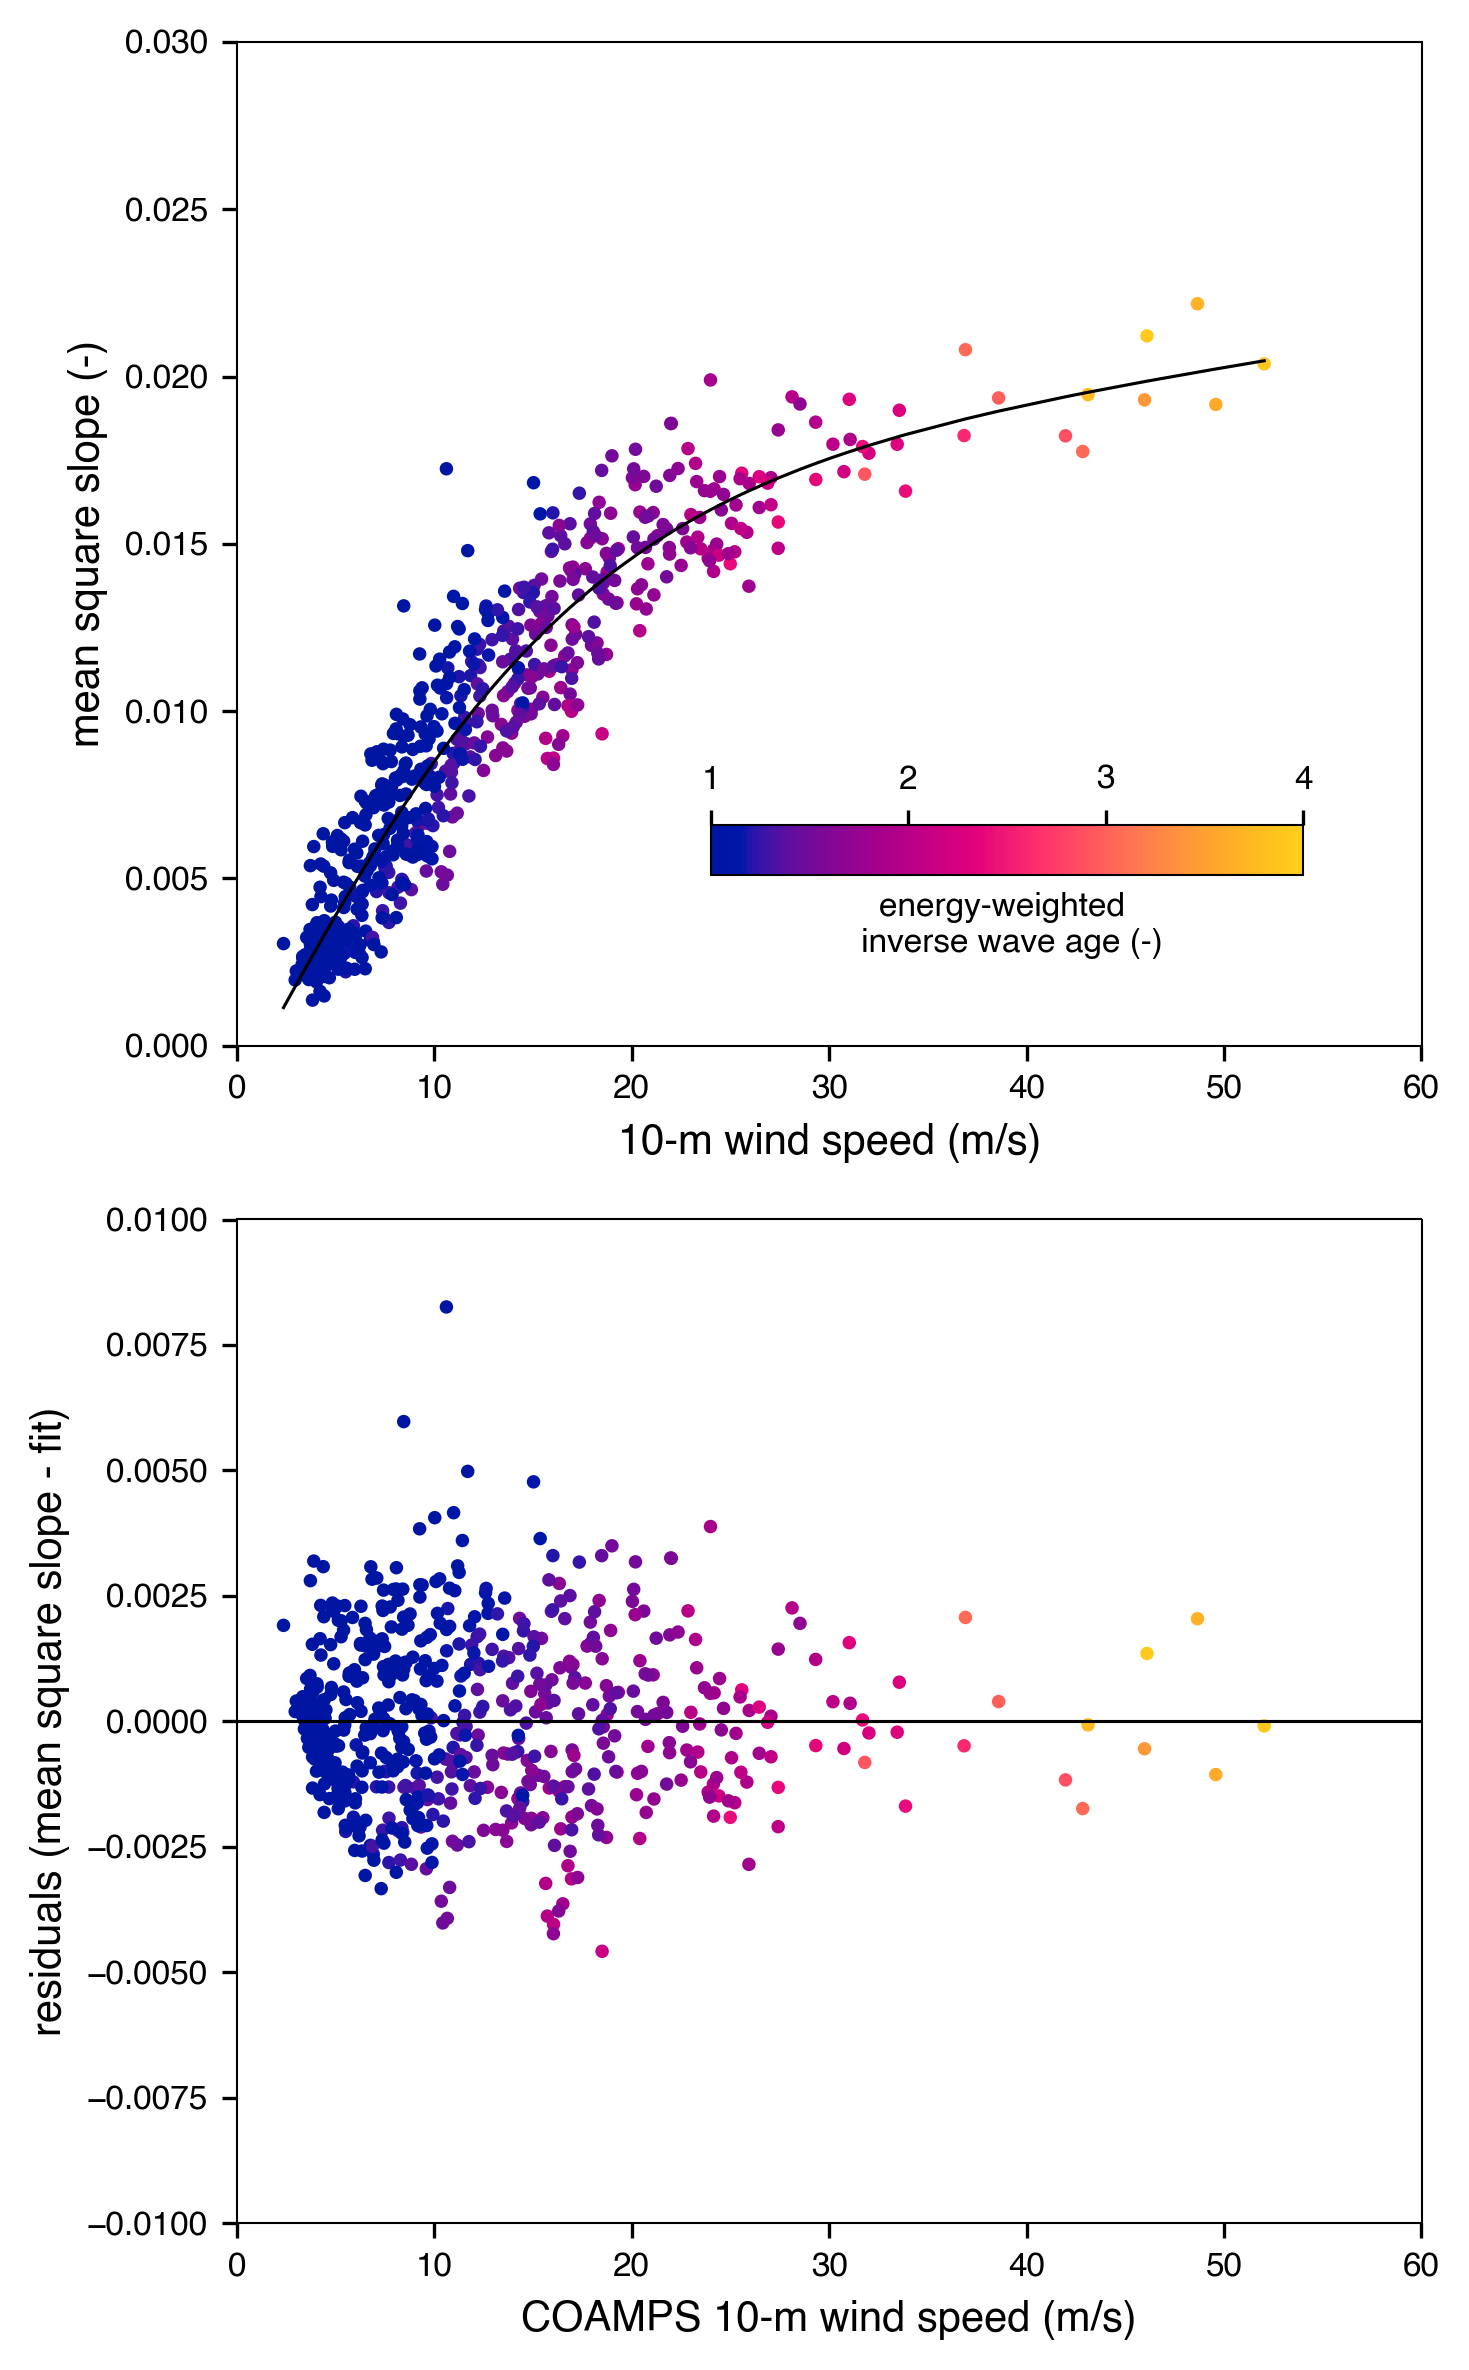

In [35]:
def plot_mean_inverse_wave_age_fit(
    ax,
    **kwargs,
):
    color_column_name = 'mean_inverse_wave_age'
    cmap = plotting.mean_inverse_wave_age_plot_kwargs['cmap']
    norm = plotting.mean_inverse_wave_age_plot_kwargs['norm']

    # fit data
    drifter_mss_sc = plot_drifter_mss(
        ax=ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )

    # colorbar
    cbar, cax = plotting.create_inset_colorbar(
        drifter_mss_sc[0],
        ax,
        # bounds=[0.4, 0.12, 0.5, 0.05],
        bounds=[0.4, 0.17, 0.5, 0.05],
        orientation='horizontal'
    )
    cax.xaxis.set_ticks_position('top')
    cax.xaxis.set_label_position('bottom')
    cbar.set_ticks(np.linspace(1, 4, 4))
    cbar.set_label(
        # 'inverse wave age (-)',
        'energy-weighted \n inverse wave age (-)',
         fontsize=plotting.small_font_size,
    )
    return drifter_mss_sc, cbar


def plot_mean_inverse_wave_age_residuals(
    ax,
    **kwargs,
):
    color_column_name = 'mean_inverse_wave_age'
    cmap = plotting.mean_inverse_wave_age_plot_kwargs['cmap']
    norm = plotting.mean_inverse_wave_age_plot_kwargs['norm']

    # residuals
    drifter_mss_residuals_sc = plot_drifter_mss_residuals(
        ax=ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )

    # colorbar
    cbar = None
    return drifter_mss_residuals_sc, cbar


fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharex=True)
plot_mean_inverse_wave_age_fit(
    axes[0],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    fit_df=fit_df,
    s=5
)
plot_mean_inverse_wave_age_residuals(
    axes[1],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    s=5
)
axes[0].xaxis.set_tick_params(labelbottom=True)
fig.tight_layout()

### Depth

Waves steepen as they shoal, and the Idalia observations are in shallow water (10 m to 30 m) relative to the wavelength of the larger waves.
Plot mean square slope and residuals versus wind speed colored by depth.

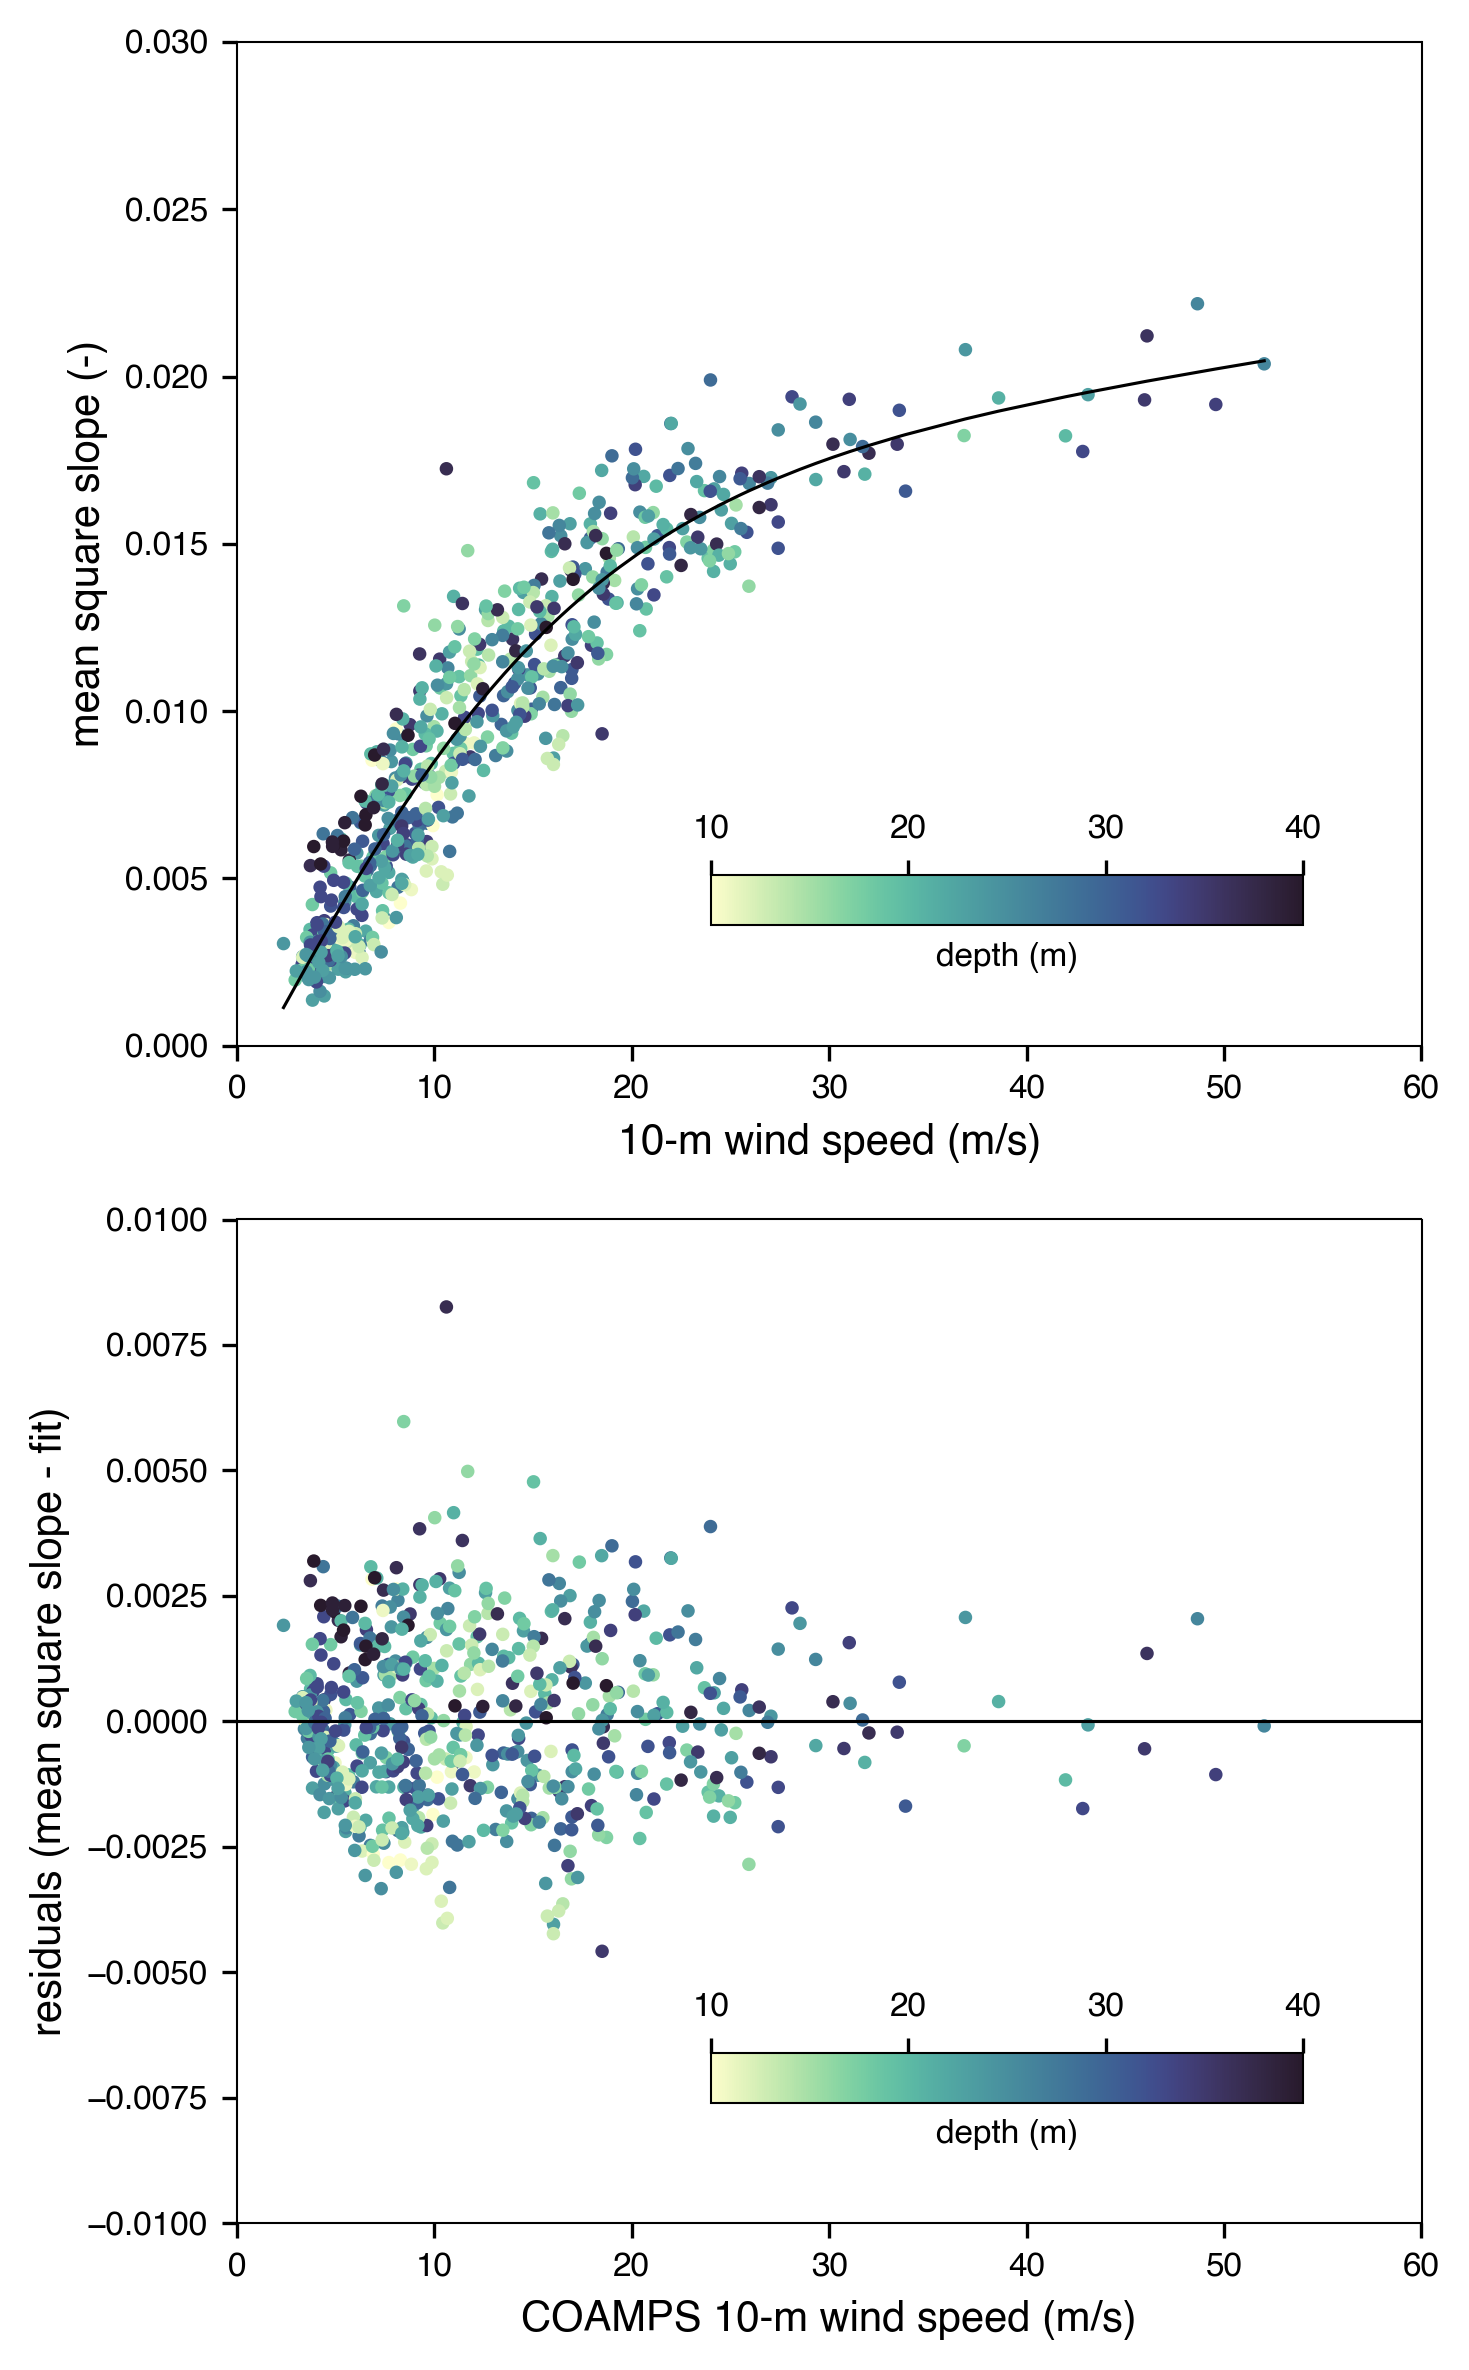

In [36]:
def plot_depth_fit(
    ax,
    **kwargs
):
    color_column_name = 'depth'
    cmap = plotting.depth_plot_kwargs['cmap']
    norm = plotting.depth_plot_kwargs['norm']

    # fit data
    drifter_mss_sc = plot_drifter_mss(
        ax=ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )

    # colorbar
    cbar, cax = plotting.create_inset_colorbar(
        drifter_mss_sc[0],
        ax,
        bounds=[0.4, 0.12, 0.5, 0.05],
        orientation='horizontal'
    )
    cax.xaxis.set_ticks_position('top')
    cax.xaxis.set_label_position('bottom')
    cbar.set_ticks(np.linspace(10, 40, 4))
    cbar.set_label(
        'depth (m)',
         fontsize=plotting.small_font_size,
    )

    return drifter_mss_sc, cbar


def plot_depth_residuals(
    ax,
    **kwargs,
):
    color_column_name = 'depth'
    cmap = plotting.depth_plot_kwargs['cmap']
    norm = plotting.depth_plot_kwargs['norm']

    # residuals
    drifter_mss_residuals_sc = plot_drifter_mss_residuals(
        ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )

    # colorbar
    cbar, cax = plotting.create_inset_colorbar(
        drifter_mss_residuals_sc[0],
        ax,
        bounds=[0.4, 0.12, 0.5, 0.05],
        orientation='horizontal'
    )
    cax.xaxis.set_ticks_position('top')
    cax.xaxis.set_label_position('bottom')
    cbar.set_ticks(np.linspace(10, 40, 4))
    cbar.set_label(
        'depth (m)',
         fontsize=plotting.small_font_size,
    )
    return drifter_mss_residuals_sc, cbar


fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharex=True)
plot_depth_fit(
    axes[0],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    fit_df=fit_df,
    s=5
)
plot_depth_residuals(
    axes[1],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    s=5
)
axes[0].xaxis.set_tick_params(labelbottom=True)
fig.tight_layout()

### Buoy type

Plot mean square slope and residuals versus wind speed colored by buoy type.

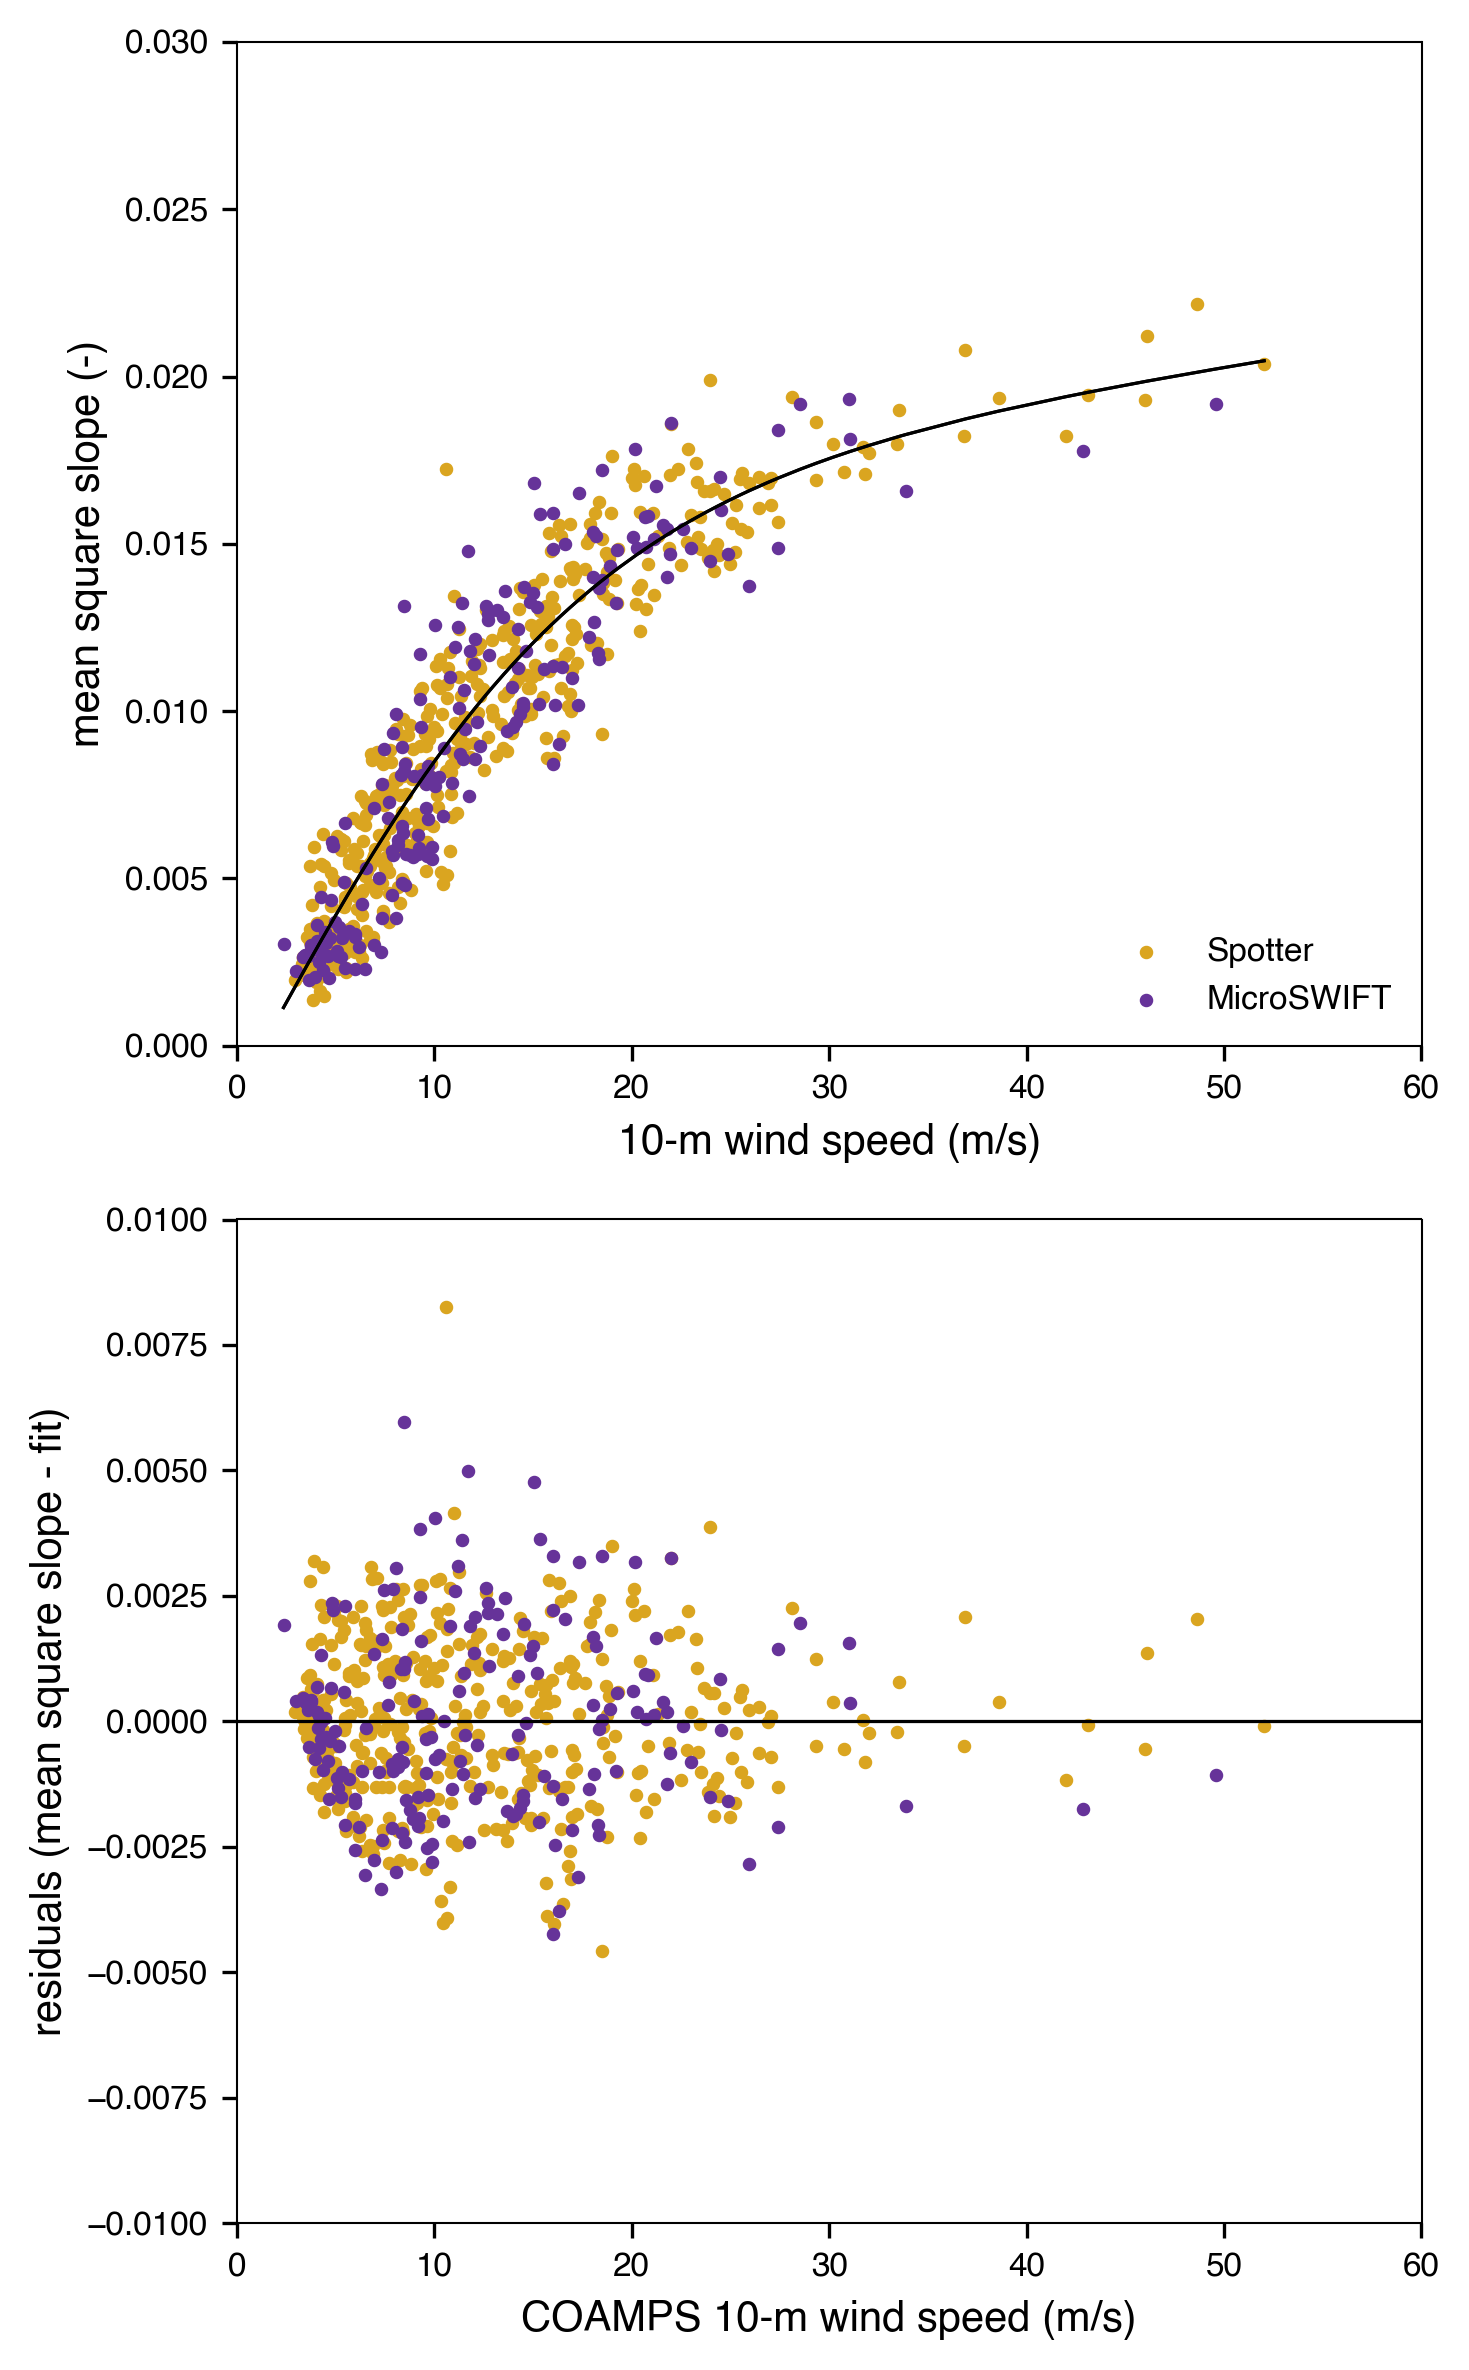

In [37]:
def plot_buoy_type_fit(
    ax,
    spotter_df,
    microswift_df,
    fit_df,
    **kwargs
):
    # fit data
    spotter_mss_sc = plot_drifter_mss(
        ax=ax,
        spotter_df=spotter_df,
        fit_df=fit_df,
        color=plotting.get_drifter_color('spotter'),
        label=plotting.get_drifter_label('spotter'),
        **kwargs
    )
    microswift_mss_sc = plot_drifter_mss(
        ax=ax,
        microswift_df=microswift_df,
        fit_df=fit_df,
        color=plotting.get_drifter_color('microswift'),
        label=plotting.get_drifter_label('microswift'),
        **kwargs
    )
    ax.legend(handles=[*spotter_mss_sc, *microswift_mss_sc], loc='lower right', frameon=False)
    return microswift_mss_sc, spotter_mss_sc


def plot_depth_residuals(
    ax,
    spotter_df,
    microswift_df,
    **kwargs,
):

    # residuals
    drifter_spotter_residuals_sc = plot_drifter_mss_residuals(
        ax=ax,
        spotter_df=spotter_df,
        color=plotting.get_drifter_color('spotter'),
        **kwargs
    )
    drifter_mss_residuals_sc = plot_drifter_mss_residuals(
        ax=ax,
        microswift_df=microswift_df,
        color=plotting.get_drifter_color('microswift'),
        **kwargs
    )
    return drifter_mss_residuals_sc, drifter_spotter_residuals_sc


fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharex=True)
plot_buoy_type_fit(
    axes[0],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    fit_df=fit_df,
    s=5
)
plot_depth_residuals(
    axes[1],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    s=5,
)
axes[0].xaxis.set_tick_params(labelbottom=True)
fig.tight_layout()

### Mean directional spread

Normalization of mss by directional spread was found to improve parameterizations by Banner et al. (2002) and Schwendeman et al. (2014).
Plot mean square slope and residuals versus wind speed colored by mean directional spread.

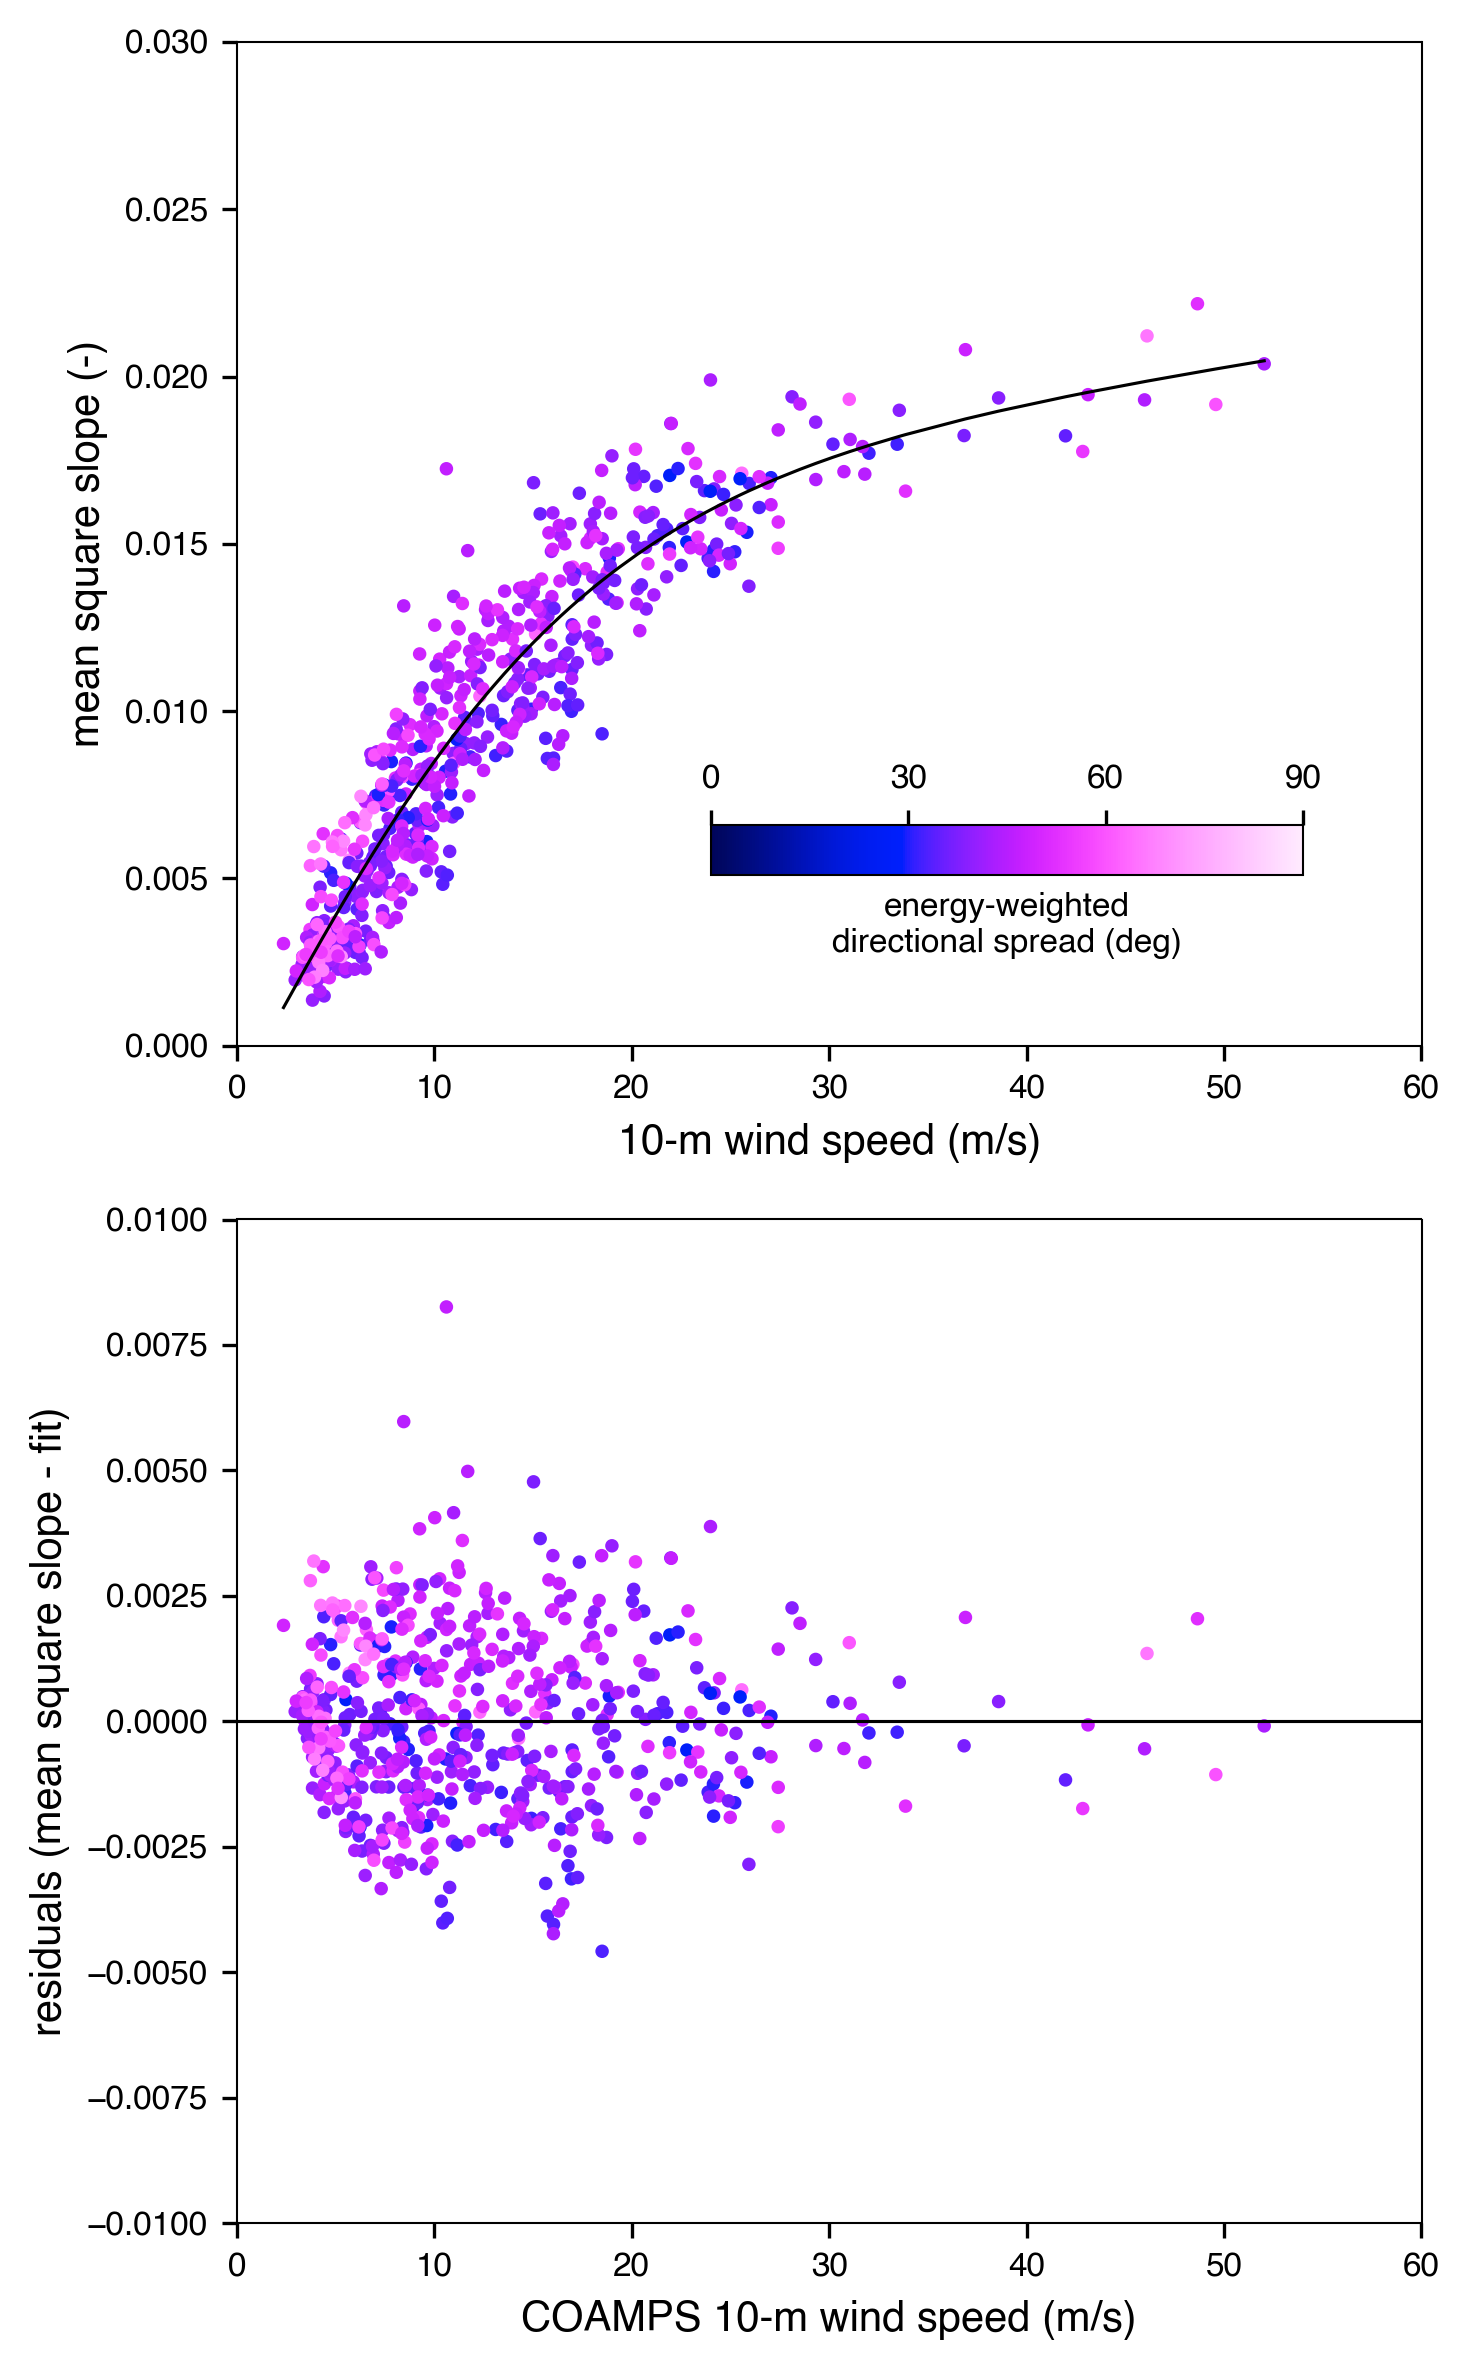

In [38]:
def plot_energy_weighted_spread_fit(
    ax,
    **kwargs
):
    color_column_name = 'mean_directional_spread'
    cmap = plotting.directional_spread_plot_kwargs['cmap']
    norm = plotting.directional_spread_plot_kwargs['norm']

    # fit data
    drifter_mss_sc = plot_drifter_mss(
        ax=ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )

    # colorbar
    cbar, cax = plotting.create_inset_colorbar(
        drifter_mss_sc[0],
        ax,
        bounds=[0.4, 0.17, 0.5, 0.05],
        orientation='horizontal'
    )
    cax.xaxis.set_ticks_position('top')
    cax.xaxis.set_label_position('bottom')
    cbar.set_ticks(np.linspace(norm.vmin, norm.vmax, 4))
    cbar.set_label(
        'energy-weighted\ndirectional spread (deg)',
        fontsize=plotting.small_font_size,
    )
    return drifter_mss_sc, cbar


def plot_energy_weighted_spread_residuals(
    ax,
    **kwargs,
):
    color_column_name = 'mean_directional_spread'
    cmap = plotting.directional_spread_plot_kwargs['cmap']
    norm = plotting.directional_spread_plot_kwargs['norm']

    # residuals
    drifter_mss_residuals_sc = plot_drifter_mss_residuals(
        ax=ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )

    # colorbar
    cbar = None

    return drifter_mss_residuals_sc, cbar


fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharex=True)
plot_energy_weighted_spread_fit(
    axes[0],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    fit_df=fit_df,
    s=5
)
plot_energy_weighted_spread_residuals(
    axes[1],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    s=5
)
axes[0].xaxis.set_tick_params(labelbottom=True)
fig.tight_layout()

Plot mean square slope and residuals versus wind speed colored by mss-weighted directional spread.

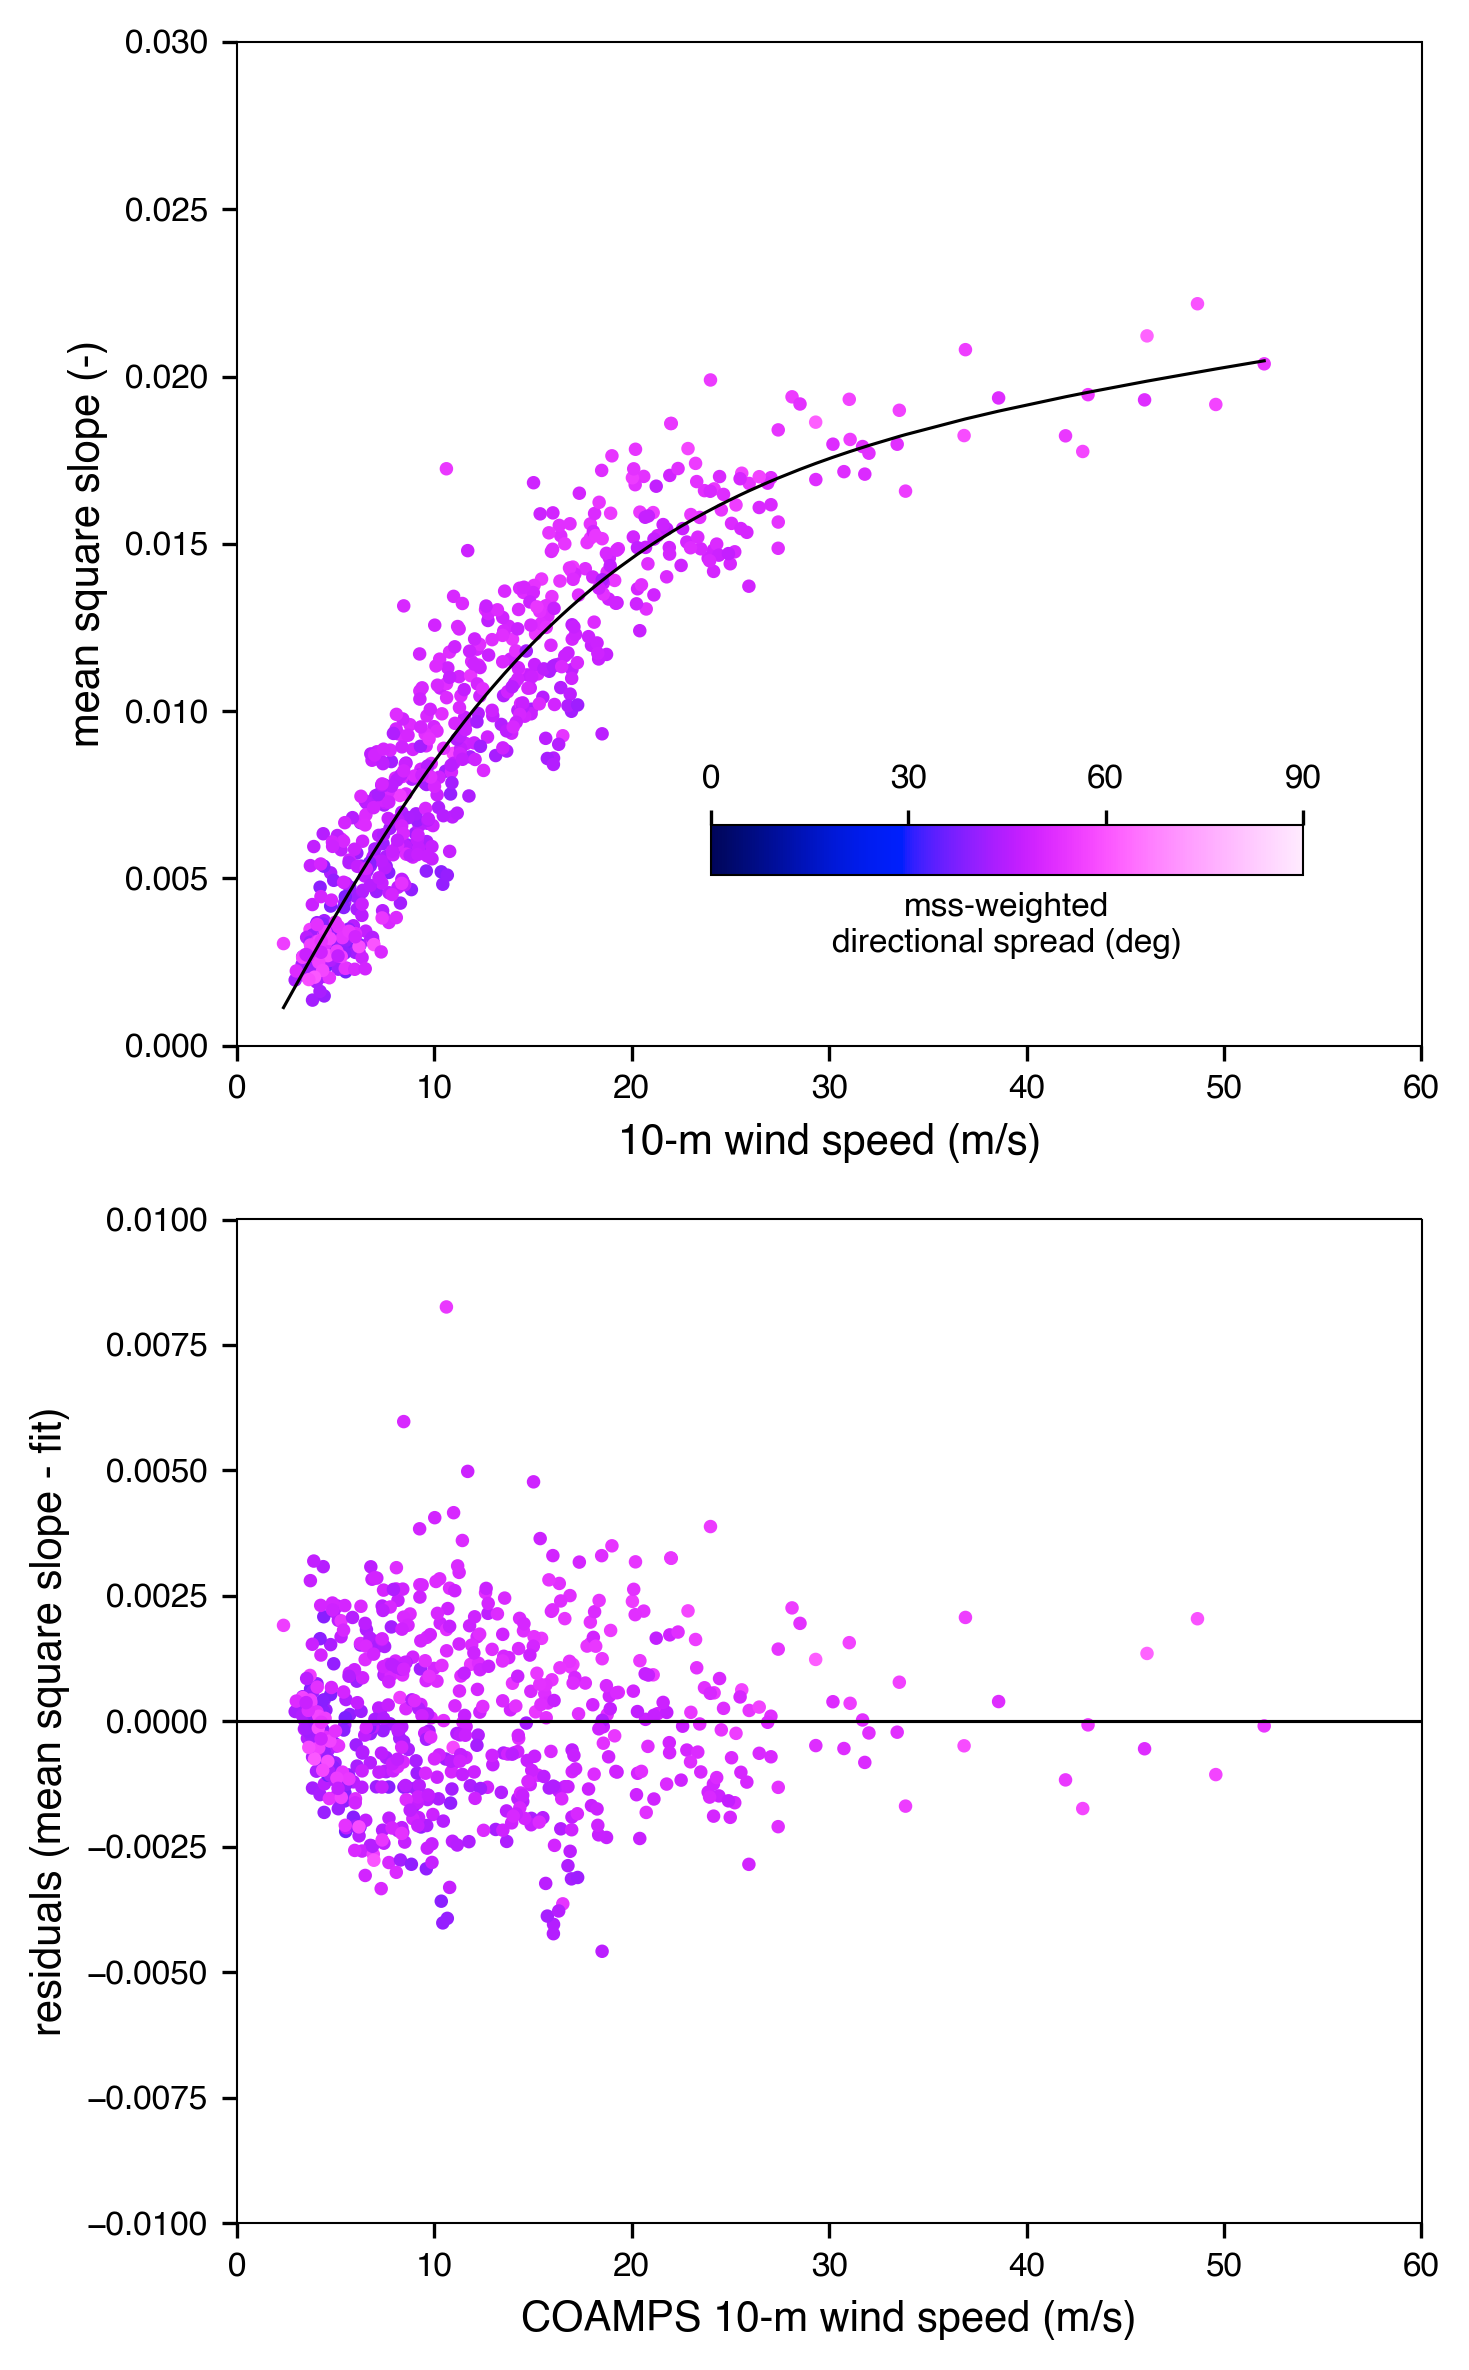

In [39]:
def plot_mss_weighted_spread_fit(
    ax,
    **kwargs
):
    color_column_name = 'mss_weighted_directional_spread'
    cmap = plotting.directional_spread_plot_kwargs['cmap']
    norm = plotting.directional_spread_plot_kwargs['norm']

    # fit data
    drifter_mss_sc = plot_drifter_mss(
        ax=ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )

    # colorbar
    cbar, cax = plotting.create_inset_colorbar(
        drifter_mss_sc[0],
        ax,
        bounds=[0.4, 0.17, 0.5, 0.05],
        orientation='horizontal'
    )
    cax.xaxis.set_ticks_position('top')
    cax.xaxis.set_label_position('bottom')
    cbar.set_ticks(np.linspace(norm.vmin, norm.vmax, 4))
    cbar.set_label(
        'mss-weighted\ndirectional spread (deg)',
        fontsize=plotting.small_font_size,
    )
    return drifter_mss_sc, cbar


def plot_mss_weighted_spread_residuals(
    ax,
    **kwargs,
):
    color_column_name = 'mss_weighted_directional_spread'
    cmap = plotting.directional_spread_plot_kwargs['cmap']
    norm = plotting.directional_spread_plot_kwargs['norm']

    # residuals
    drifter_mss_residuals_sc = plot_drifter_mss_residuals(
        ax=ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )

    # colorbar
    cbar = None

    return drifter_mss_residuals_sc, cbar


fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharex=True)
plot_mss_weighted_spread_fit(
    axes[0],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    fit_df=fit_df,
    s=5
)
plot_mss_weighted_spread_residuals(
    axes[1],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    s=5
)
axes[0].xaxis.set_tick_params(labelbottom=True)
fig.tight_layout()

### Drift Speed

Buoy drift speed is a proxy for surface current magnitude.
Plot mean square slope and residuals versus wind speed colored by drift speed.

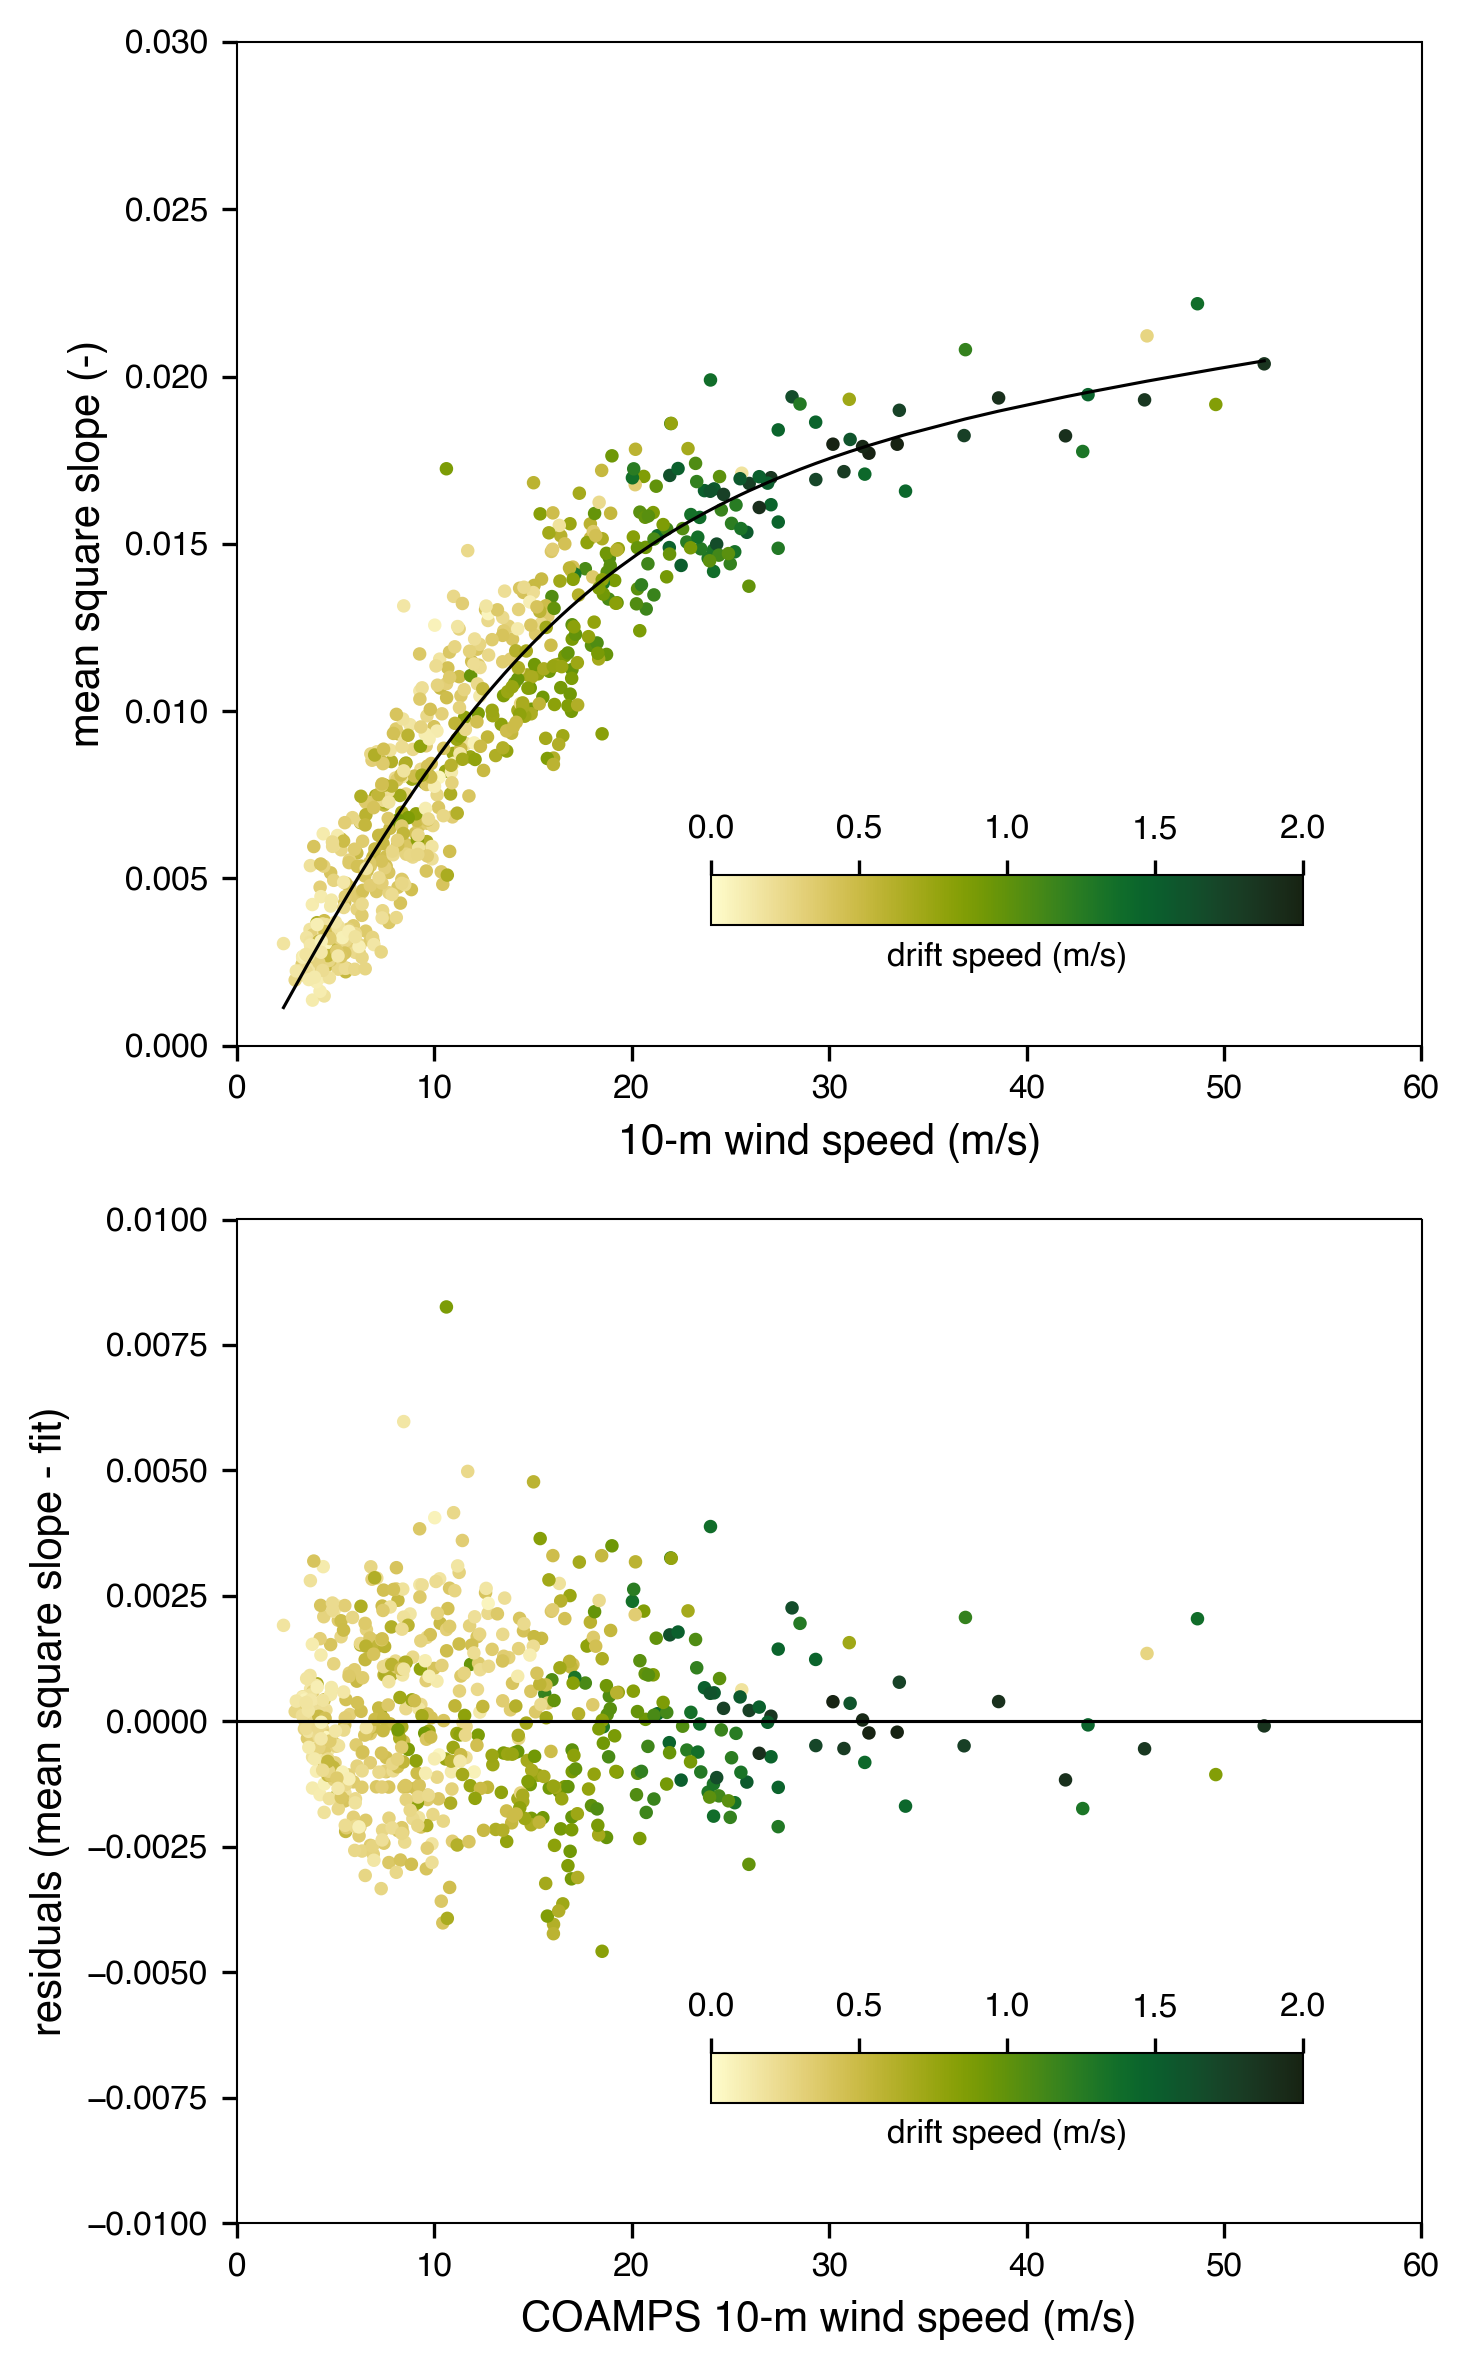

In [40]:
def plot_drift_speed_fit(
    ax,
    **kwargs
):
    color_column_name = 'drift_speed'
    cmap = plotting.drift_speed_plot_kwargs['cmap']
    norm = plotting.drift_speed_plot_kwargs['norm']

    # fit data
    drifter_mss_sc = plot_drifter_mss(
        ax=ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )

    # colorbar
    cbar, cax = plotting.create_inset_colorbar(
        drifter_mss_sc[0],
        ax,
        bounds=[0.4, 0.12, 0.5, 0.05],
        orientation='horizontal'
    )
    cax.xaxis.set_ticks_position('top')
    cax.xaxis.set_label_position('bottom')
    cbar.set_label(
        'drift speed (m/s)',
        fontsize=plotting.small_font_size,
    )
    return drifter_mss_sc, cbar


def plot_drift_speed_residuals(
    ax,
    **kwargs,
):
    color_column_name = 'drift_speed'
    cmap = plotting.drift_speed_plot_kwargs['cmap']
    norm = plotting.drift_speed_plot_kwargs['norm']

    # residuals
    drifter_mss_residuals_sc = plot_drifter_mss_residuals(
        ax=ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )
    # colorbar
    cbar, cax = plotting.create_inset_colorbar(
        drifter_mss_residuals_sc[0],
        ax,
        bounds=[0.4, 0.12, 0.5, 0.05],
        orientation='horizontal'
    )
    cax.xaxis.set_ticks_position('top')
    cax.xaxis.set_label_position('bottom')
    cbar.set_label(
        'drift speed (m/s)',
        fontsize=plotting.small_font_size,
    )
    return drifter_mss_residuals_sc, cbar


fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharex=True)
plot_drift_speed_fit(
    axes[0],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    fit_df=fit_df,
    s=5
)
plot_drift_speed_residuals(
    axes[1],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    s=5
)
axes[0].xaxis.set_tick_params(labelbottom=True)
fig.tight_layout()

### Projected drift speed

When projected onto wave direction, projected drift speed can elevate or lower mss as observed in Iyer et al. (2022).
Plot mean square slope and residuals versus wind speed colored by drift speed projected onto mss-weighted wave direction.

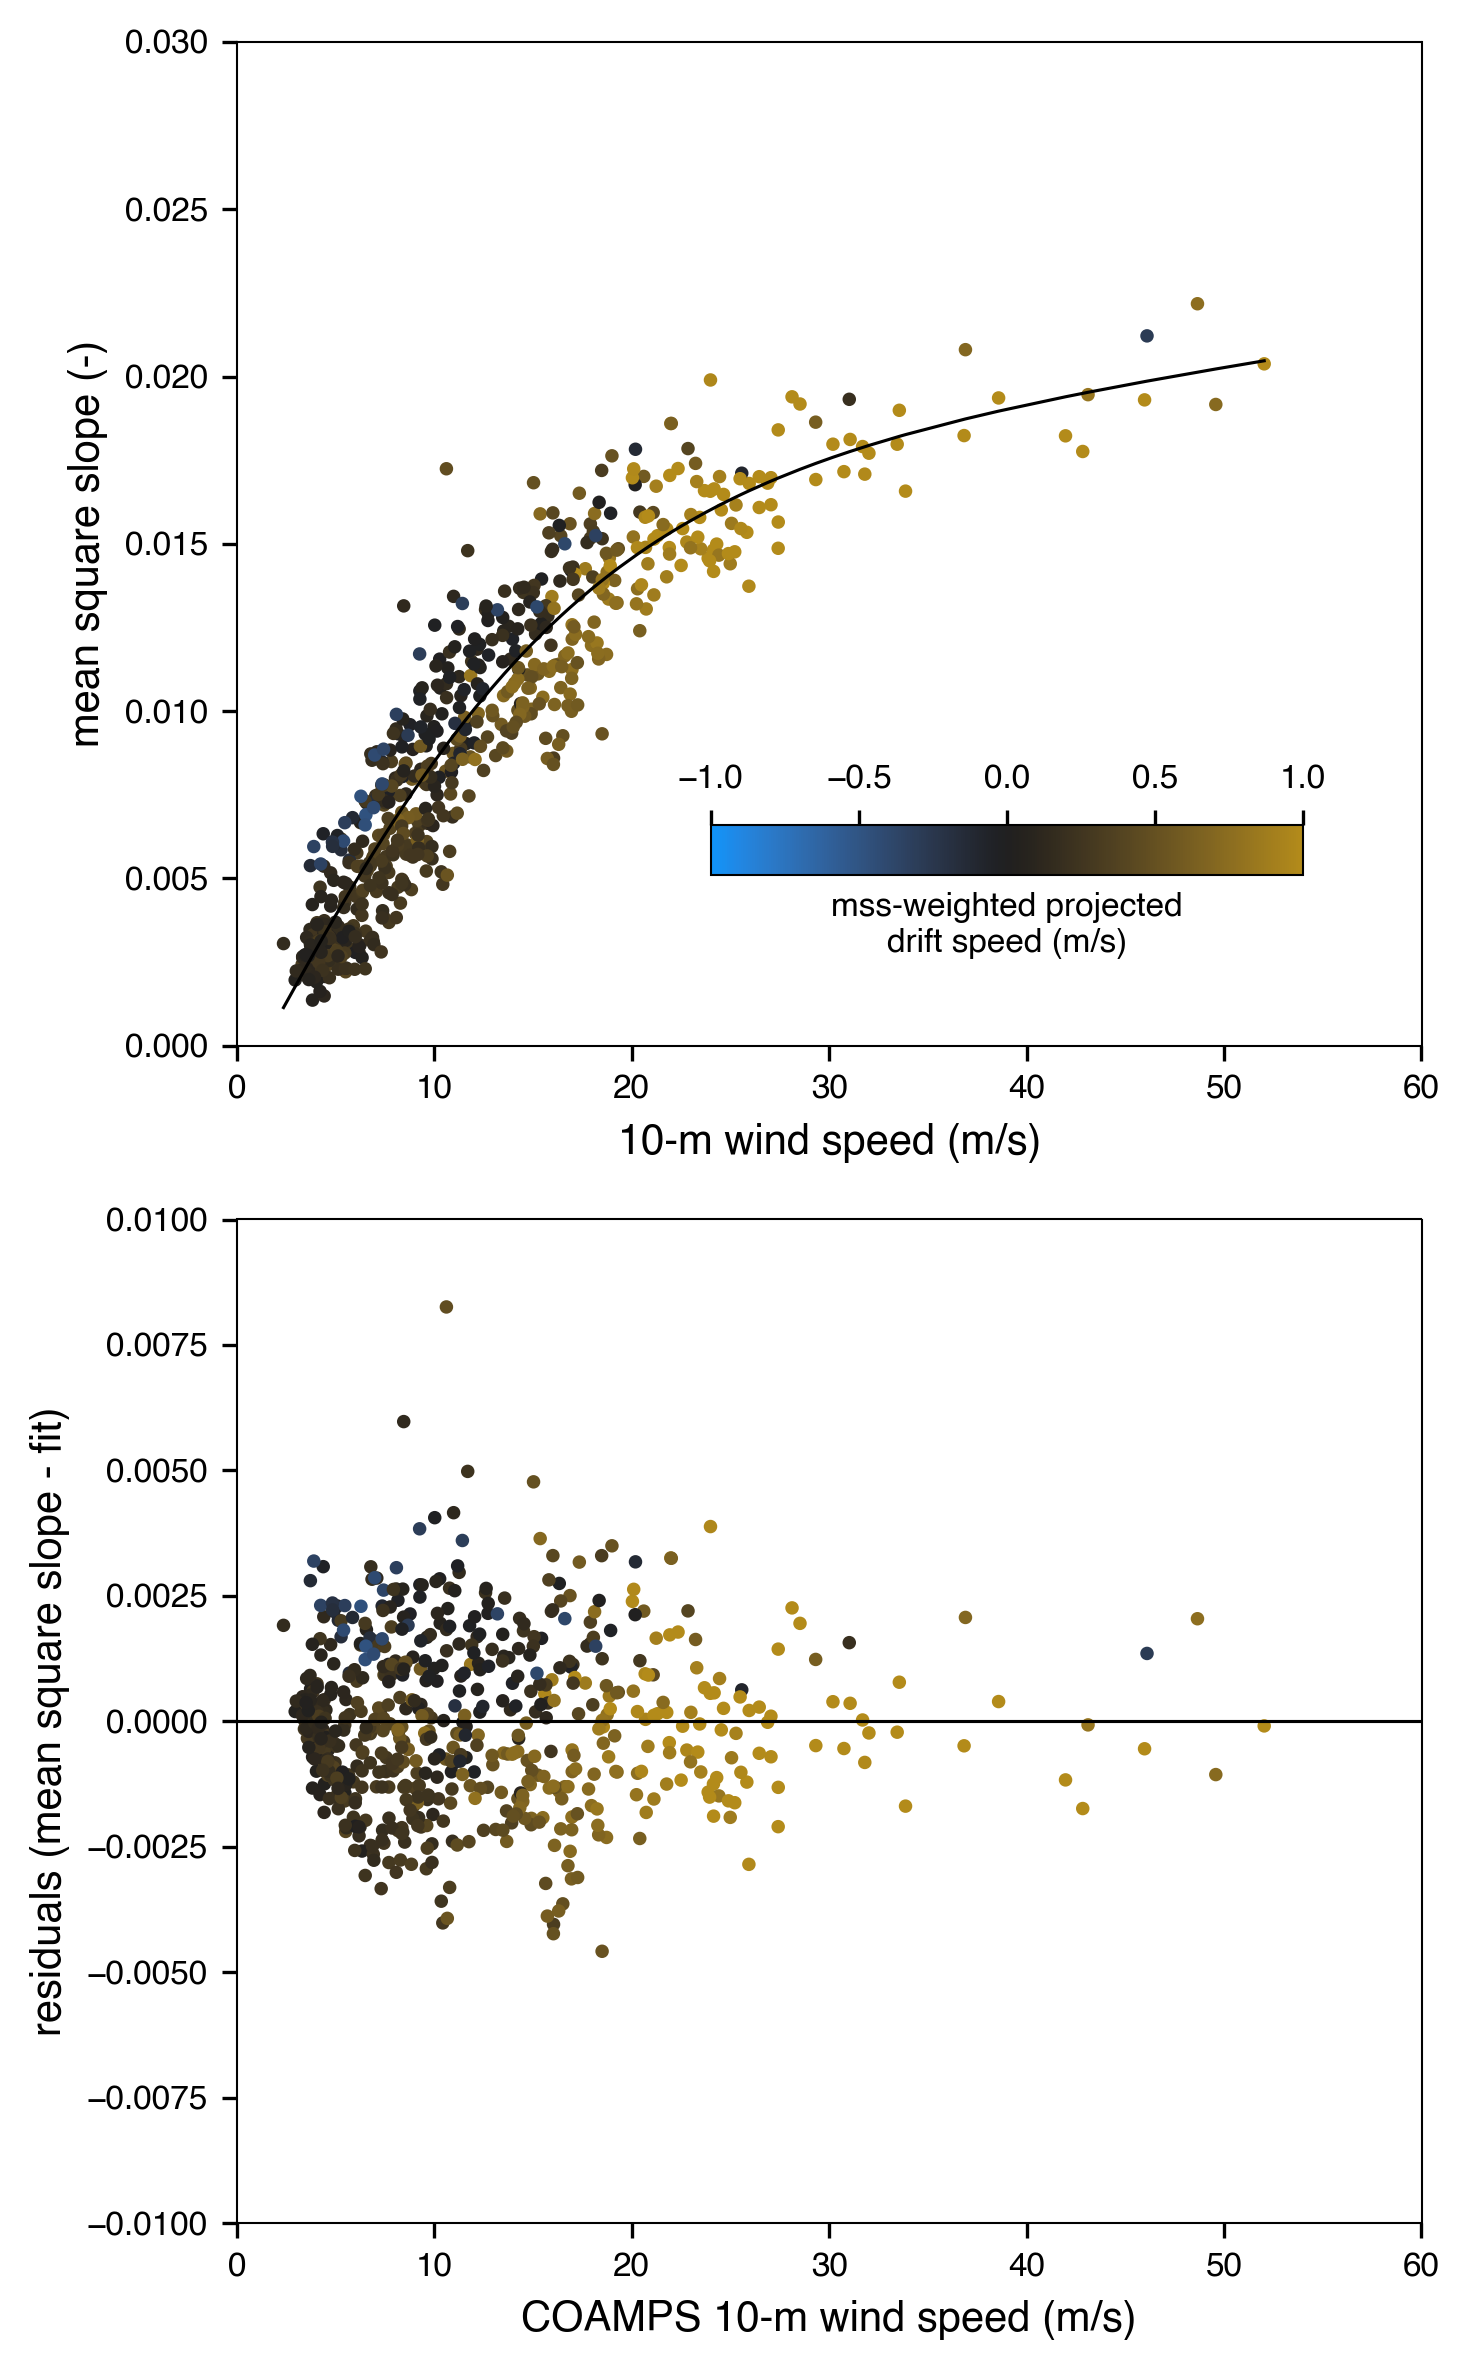

In [41]:
def plot_projected_drift_speed_fit(
    ax,
    **kwargs
):
    color_column_name = 'mss_weighted_projected_drift_speed'
    cmap = plotting.projected_drift_speed_plot_kwargs['cmap']
    norm = plotting.projected_drift_speed_plot_kwargs['norm']

    # fit data
    drifter_mss_sc = plot_drifter_mss(
        ax=ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )

    # colorbar
    cbar, cax = plotting.create_inset_colorbar(
        drifter_mss_sc[0],
        ax,
        bounds=[0.4, 0.17, 0.5, 0.05],
        orientation='horizontal'
    )
    cax.xaxis.set_ticks_position('top')
    cax.xaxis.set_label_position('bottom')
    cbar.set_label(
        'mss-weighted projected\ndrift speed (m/s)',
        fontsize=plotting.small_font_size,
    )
    return drifter_mss_sc, cbar


def plot_projected_drift_speed_residuals(
    ax,
    **kwargs,
):
    color_column_name = 'mss_weighted_projected_drift_speed'
    cmap = plotting.projected_drift_speed_plot_kwargs['cmap']
    norm = plotting.projected_drift_speed_plot_kwargs['norm']

    # residuals
    drifter_mss_residuals_sc = plot_drifter_mss_residuals(
        ax=ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )
    cbar = None

    return drifter_mss_residuals_sc, cbar


fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharex=True)
plot_projected_drift_speed_fit(
    axes[0],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    fit_df=fit_df,
    s=5
)
plot_projected_drift_speed_residuals(
    axes[1],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    s=5
)
axes[0].xaxis.set_tick_params(labelbottom=True)
fig.tight_layout()

### Mean Wind-Wave Alignment

Several works have described a dependence of drag coefficient on wind-wave alignment in models (Reichl et al., 2014; Chen et al., 2020; Husain et al., 2022; Manzella et al., 2024) and in observations (Hsu et al., 2019; Chen, 2022; Zhou et al., 2022).
Plot mean square slope and residuals versus wind speed colored by absolute mean wind-wave alignment.

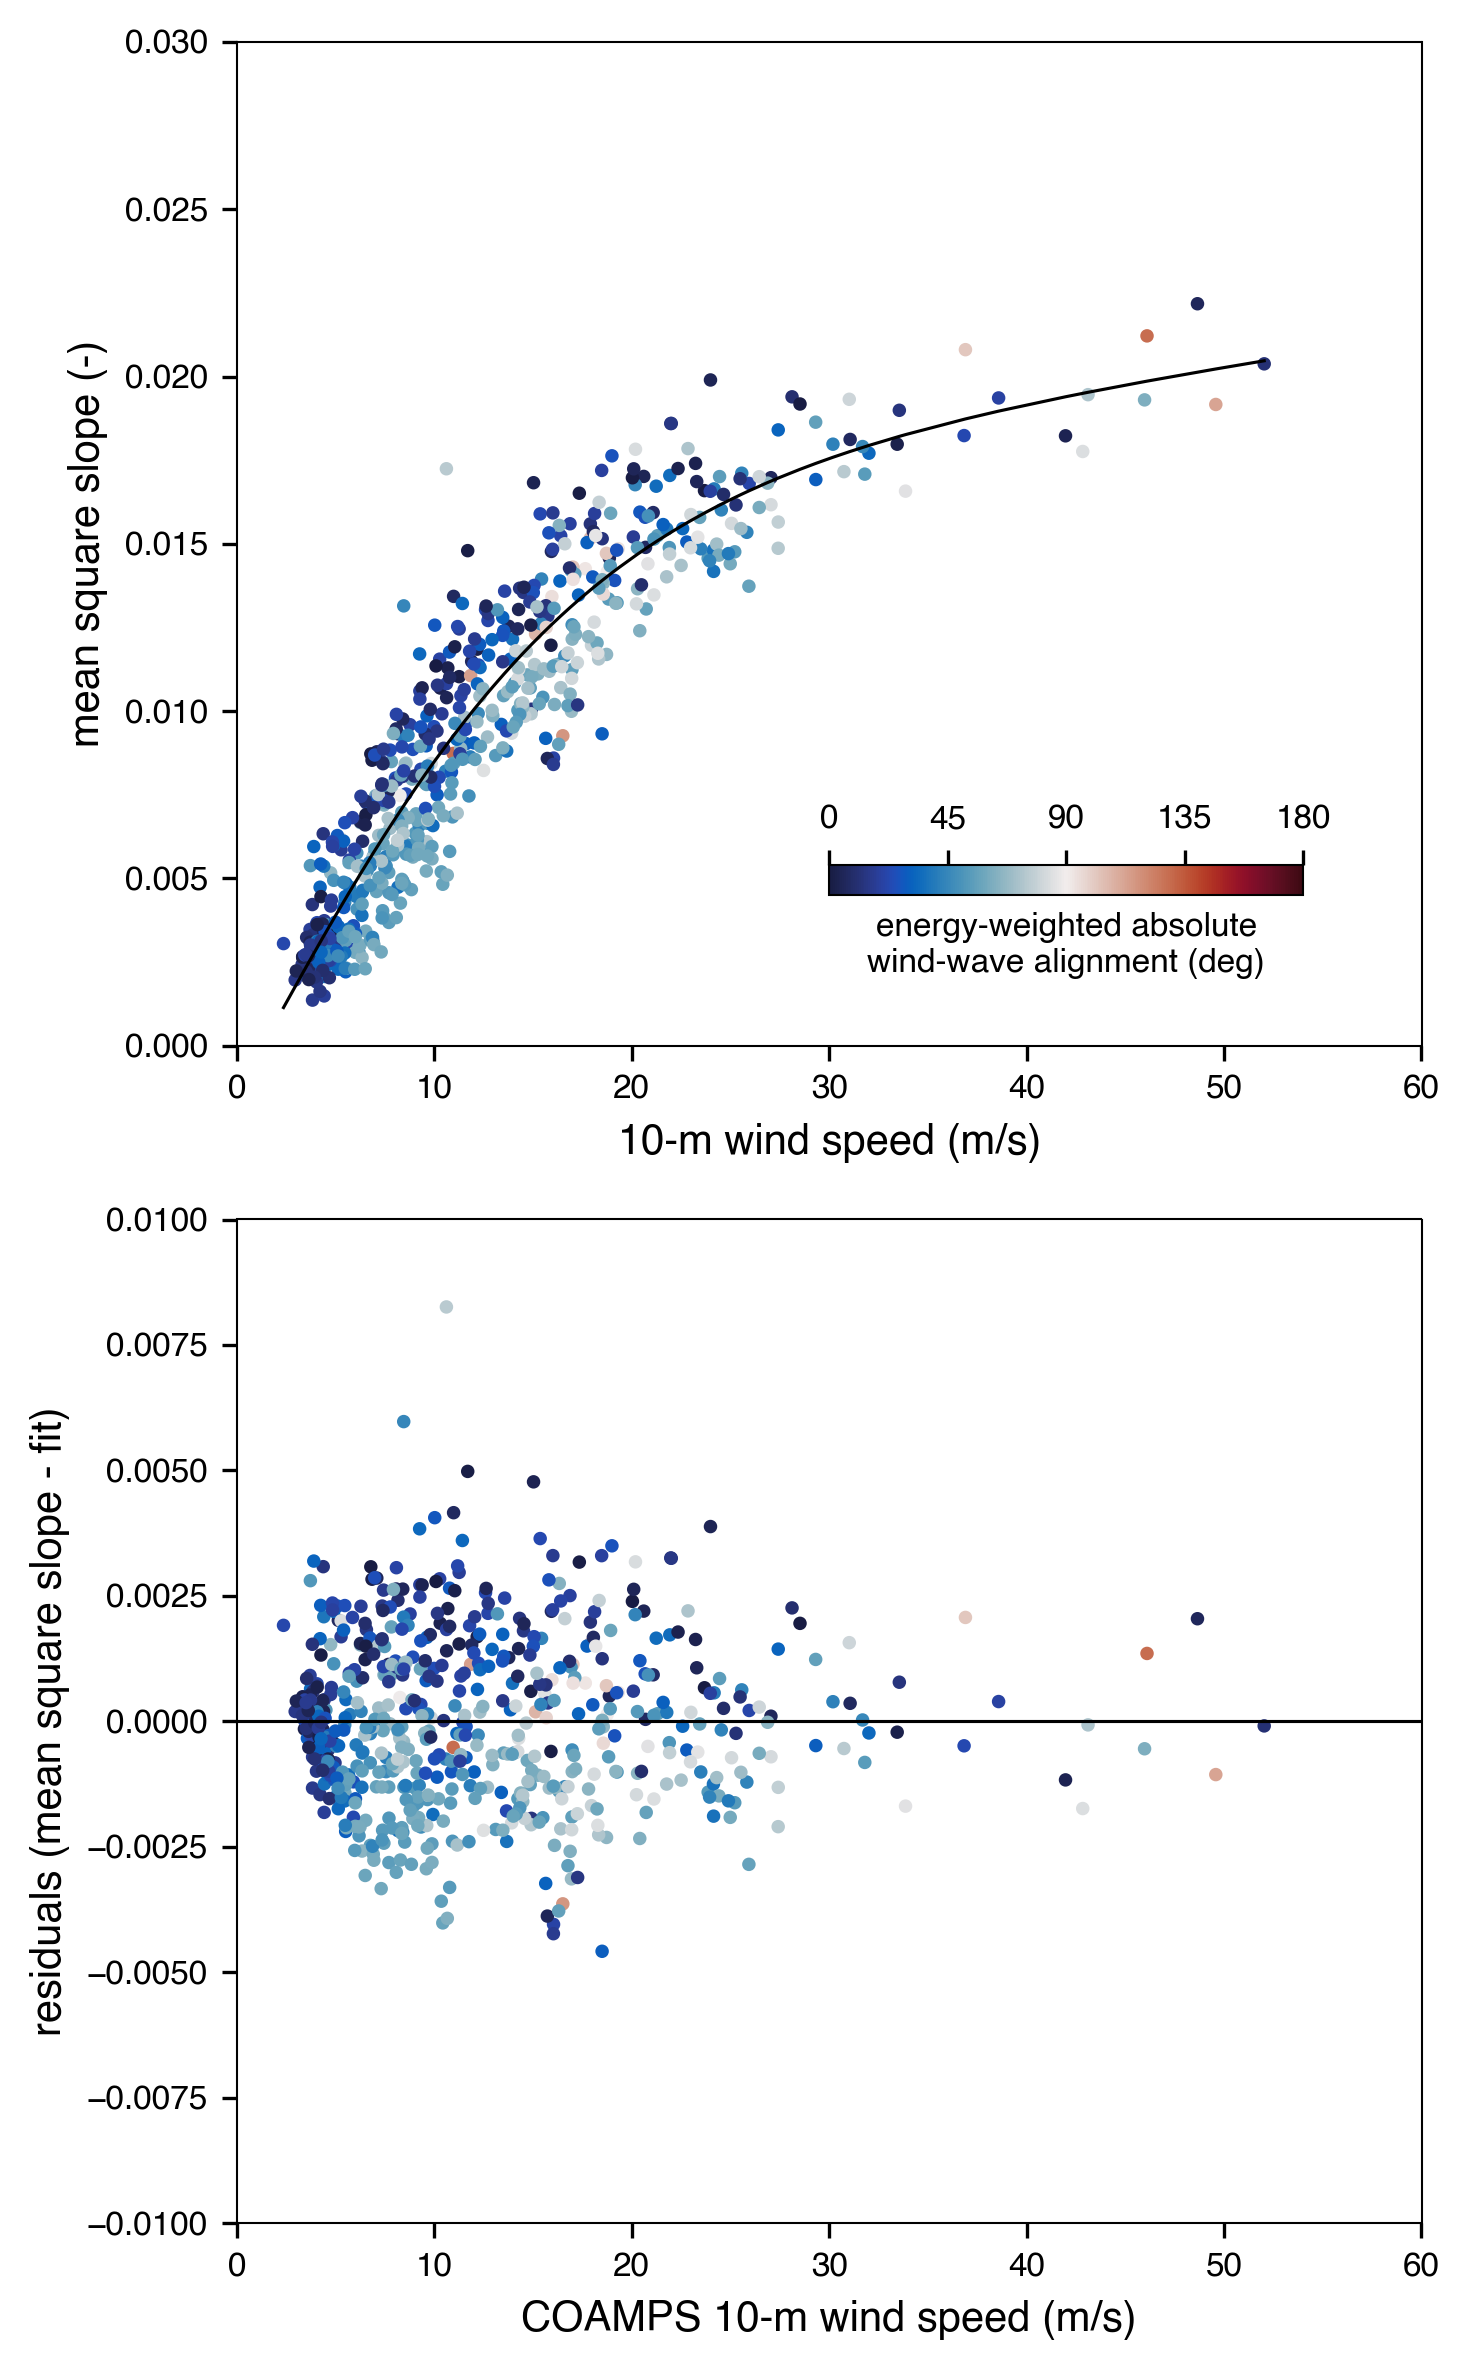

In [42]:
def plot_abs_energy_weighted_alignment_fit(
    ax,
    **kwargs
):
    color_column_name = 'mean_wind_wave_alignment_abs'
    cmap = plotting.wind_wave_alignment_abs_plot_kwargs['cmap']
    norm = plotting.wind_wave_alignment_abs_plot_kwargs['norm']

    # fit data
    drifter_mss_sc = plot_drifter_mss(
        ax=ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )

    # colorbar
    cbar, cax = plotting.create_inset_colorbar(
        drifter_mss_sc[0],
        ax,
        bounds=[0.5, 0.15, 0.4, 0.03],
        orientation='horizontal'
    )
    cax.xaxis.set_ticks_position('top')
    cax.xaxis.set_label_position('bottom')
    cbar.set_ticks(np.linspace(norm.vmin, norm.vmax, 5))
    cbar.set_label(
        'energy-weighted absolute\nwind-wave alignment (deg)',
        fontsize=plotting.small_font_size,
    )
    return drifter_mss_sc, cbar


def plot_abs_energy_weighted_alignment_residuals(
    ax,
    **kwargs,
):
    color_column_name = 'mean_wind_wave_alignment_abs'
    cmap = plotting.wind_wave_alignment_abs_plot_kwargs['cmap']
    norm = plotting.wind_wave_alignment_abs_plot_kwargs['norm']

    # residuals
    drifter_mss_residuals_sc = plot_drifter_mss_residuals(
        ax=ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )

    # colorbar
    cbar = None

    return drifter_mss_residuals_sc, cbar


fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharex=True)
plot_abs_energy_weighted_alignment_fit(
    axes[0],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    fit_df=fit_df,
    s=5
)
plot_abs_energy_weighted_alignment_residuals(
    axes[1],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    s=5
)
axes[0].xaxis.set_tick_params(labelbottom=True)
fig.tight_layout()

### Mean Wind-Wave Alignment Category

Plot mean square slope and residuals versus wind speed colored by categorized mean wind-wave alignment.

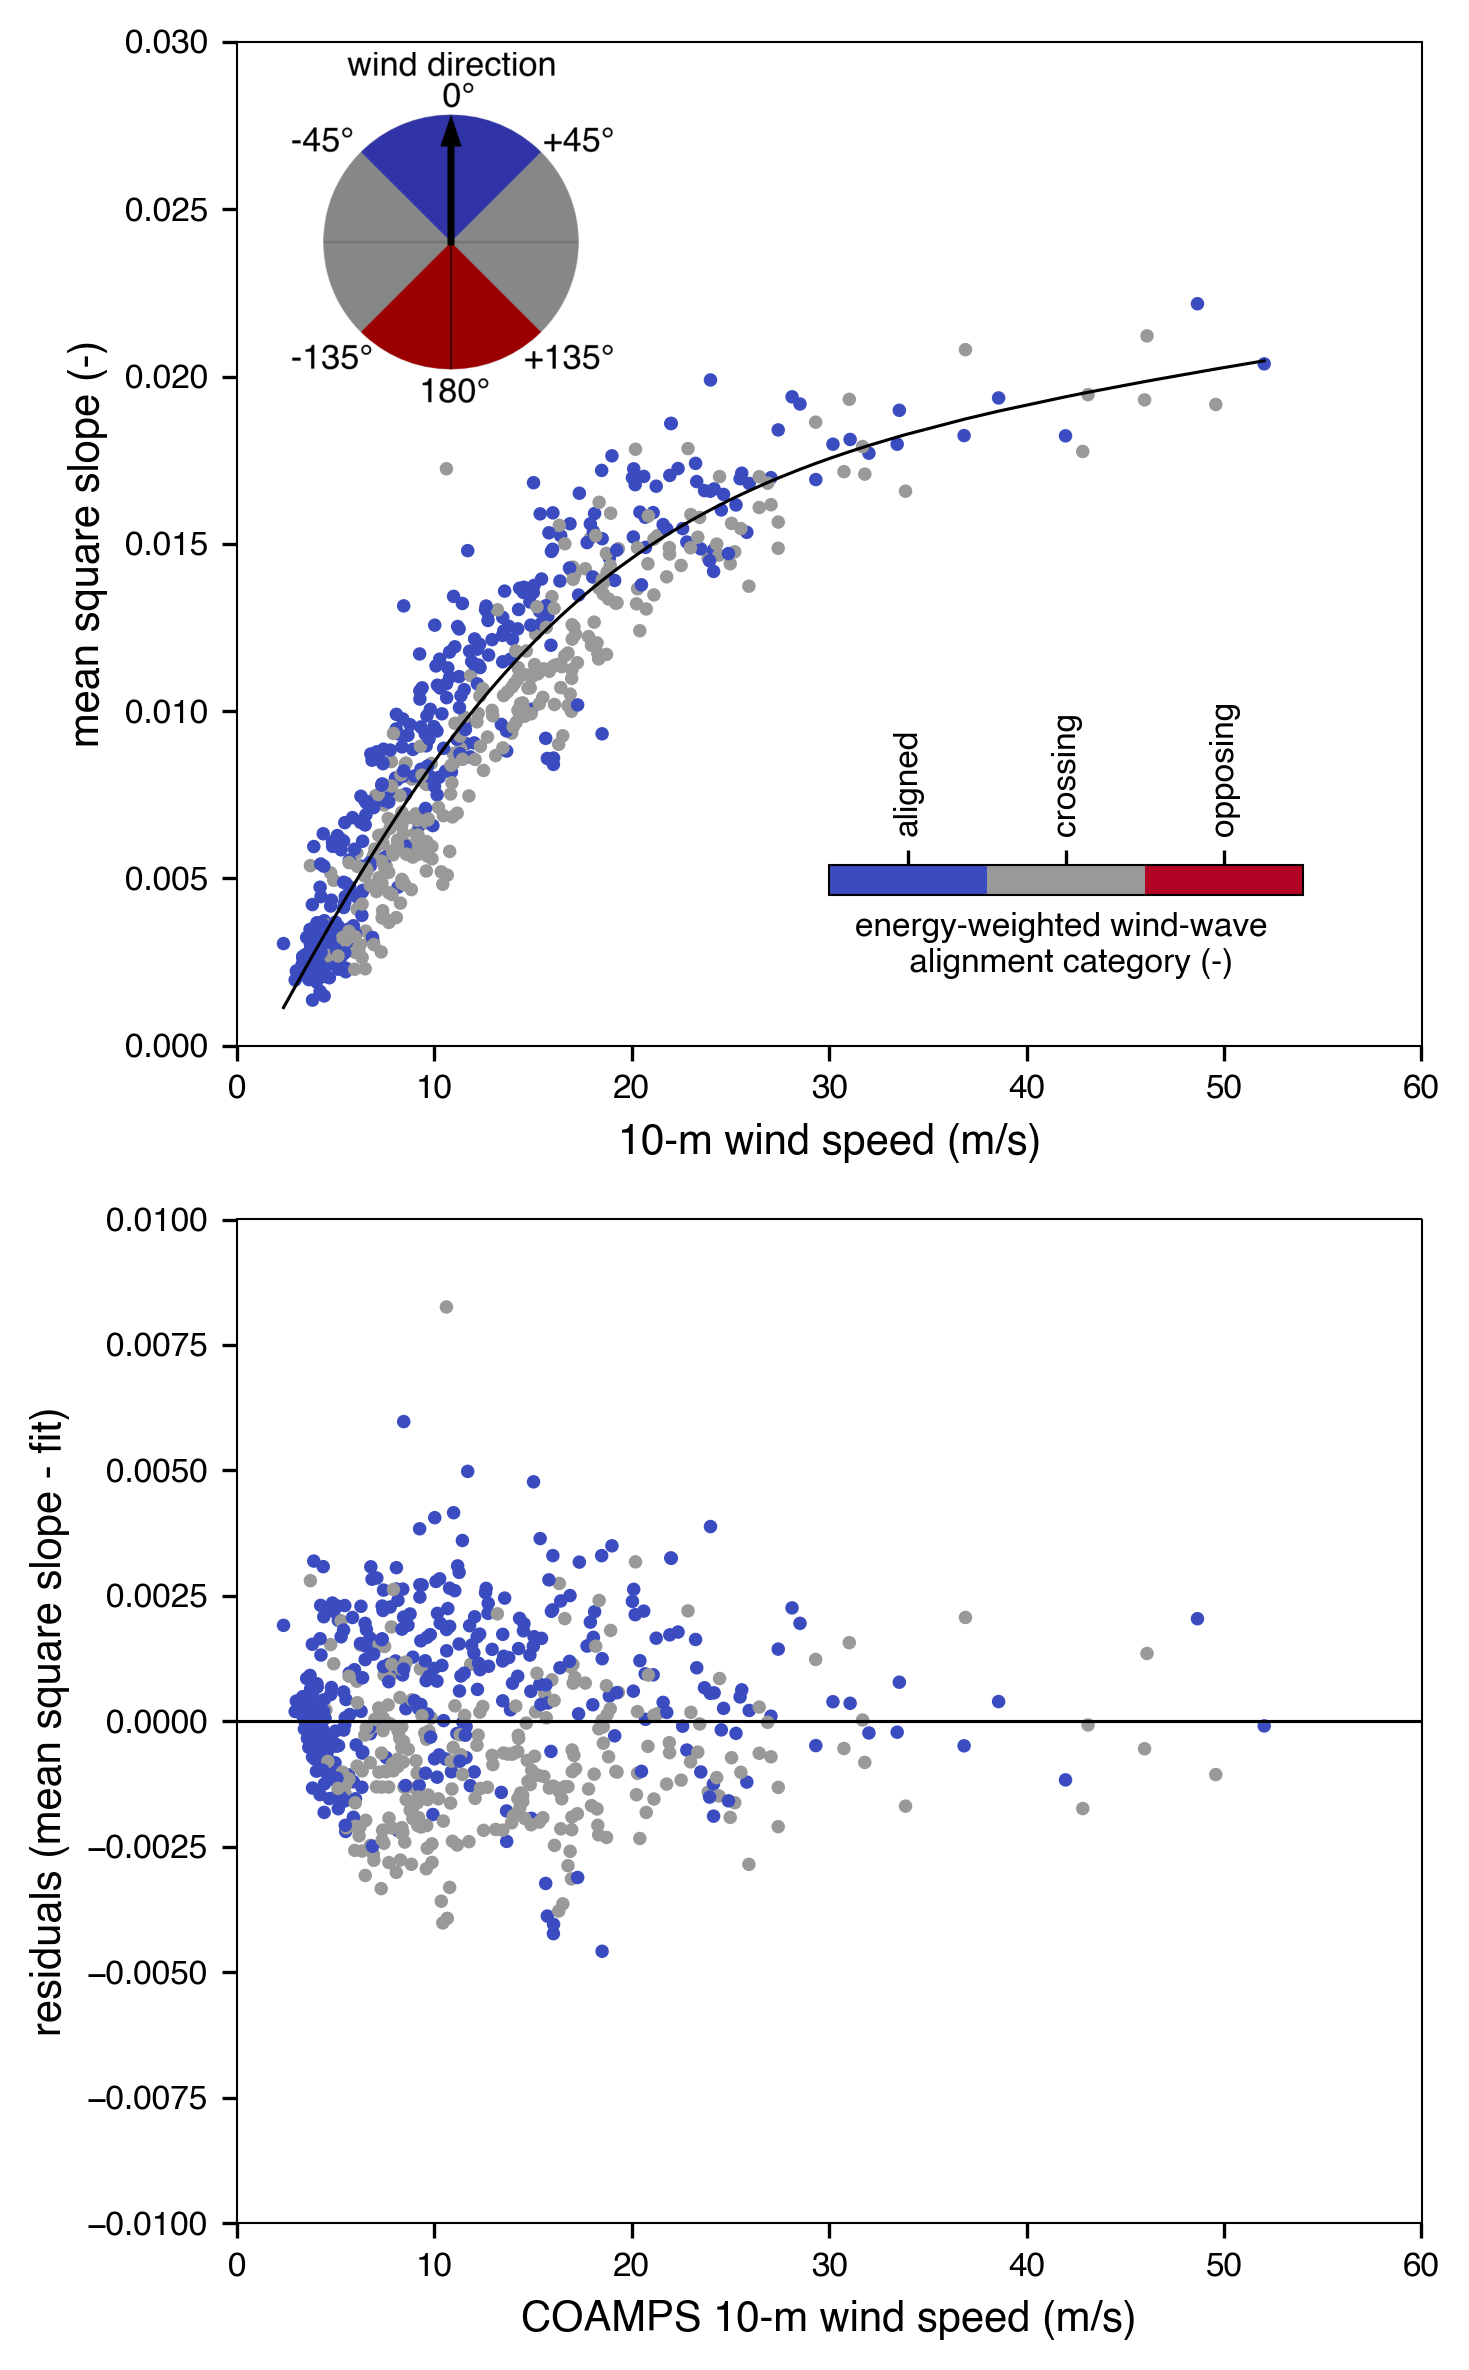

In [43]:
def plot_mean_wind_wave_alignment_cat_fit(
    ax,
    **kwargs
):
    color_column_name = 'mean_wind_wave_alignment_int'
    cmap = plotting.wind_wave_alignment_cat_plot_kwargs['cmap']
    norm = plotting.wind_wave_alignment_cat_plot_kwargs['norm']

    # fit data
    drifter_mss_sc = plot_drifter_mss(
        ax=ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )

    # colorbar
    cbar, cax = plotting.create_inset_colorbar(
        drifter_mss_sc[0],
        ax,
        bounds=[0.5, 0.15, 0.4, 0.03],
        orientation='horizontal'
    )
    cax.xaxis.set_ticks_position('top')
    cax.xaxis.set_label_position('bottom')
    cbar.set_label('energy-weighted wind-wave \n alignment category (-)', fontsize=plotting.small_font_size)
    cax.tick_params(axis='x', labelrotation=90)
    cbar_ticks = list(plotting.alignment_cat_map_inv.keys())
    cbar.set_ticks(cbar_ticks, labels=[plotting.alignment_cat_map_inv[tick] for tick in cbar_ticks])

    # Add the graphical legend
    im = plt.imread('./images/wind-wave_misalignment_legend.png')
    im_ax = ax.inset_axes([-0.02, 0.61, 0.40, 0.38], transform=ax.transAxes)  # [x0, y0, width, height]
    im_ax.imshow(im)
    im_ax.axis('off')

    return drifter_mss_sc, cbar


def plot_mean_wind_wave_alignment_cat_residuals(
    ax,
    **kwargs,
):
    color_column_name = 'mean_wind_wave_alignment_int'
    cmap = plotting.wind_wave_alignment_cat_plot_kwargs['cmap']
    norm = plotting.wind_wave_alignment_cat_plot_kwargs['norm']

    # residuals
    drifter_mss_residuals_sc = plot_drifter_mss_residuals(
        ax=ax,
        color_column_name=color_column_name,
        norm=norm,
        cmap=cmap,
        **kwargs
    )

    # colorbar
    cbar = None

    return drifter_mss_residuals_sc, cbar


fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharex=True)
plot_mean_wind_wave_alignment_cat_fit(
    axes[0],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    fit_df=fit_df,
    s=5
)
plot_mean_wind_wave_alignment_cat_residuals(
    axes[1],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    s=5
)
axes[0].xaxis.set_tick_params(labelbottom=True)
fig.tight_layout()

Of the secondary dependencies tested here, mean square slope has the strongest dependence on wind-wave alignment.
When categorized by wind-wave alignment, mean square slopes corresponding to aligned wind and waves have positive residuals (observations minus fit), generally sorting above the fit for wind speeds exceeding 5 m/s.
Where wind and waves are crossing, mss tends to lie below the fit (negative residuals).

## Down- and cross-wind mean square slope

Plot down-wind and cross-wind mss components versus wind speed colored by categorized mean wind-wave alignment.

In [44]:
def plot_drifter_mss_cross_wind(
    ax,
    spotter_df=None,
    microswift_df=None,
    color_column_name=None,
    **plot_kwargs,
):
    handles = []
    # Spotters
    if spotter_df is not None:
        spotter_mss = plotting.plot_drifter_scatter(
            spotter_df,
            ax,
            x_column_name='wind_speed',
            y_column_name='mean_square_slope_intrinsic_cross_wind',
            color_column_name=color_column_name,
            **plot_kwargs,
        )
        handles.append(spotter_mss)


    # MicroSWIFTs
    if microswift_df is not None:
        microswift_mss = plotting.plot_drifter_scatter(
            microswift_df,
            ax,
            x_column_name='wind_speed',
            y_column_name='mean_square_slope_intrinsic_cross_wind',
            color_column_name=color_column_name,
            **plot_kwargs,
        )
        handles.append(microswift_mss)

    # axes
    ax.set_xlabel('10-m wind speed (m/s)')
    ax.set_ylabel('cross-wind mean square slope (-)')
    ax.set_ylim([0, 0.015])
    ax.set_xlim([0, 60])
    ax.set_yticks(np.linspace(0, 0.015, 4))  # 7

    return handles


def plot_drifter_mss_down_wind(
    ax,
    spotter_df=None,
    microswift_df=None,
    color_column_name=None,
    **plot_kwargs,
):
    handles = []
    # Spotters
    if spotter_df is not None:
        spotter_mss = plotting.plot_drifter_scatter(
            spotter_df,
            ax,
            x_column_name='wind_speed',
            y_column_name='mean_square_slope_intrinsic_down_wind',
            color_column_name=color_column_name,
            **plot_kwargs,
        )
        handles.append(spotter_mss)


    # MicroSWIFTs
    if microswift_df is not None:
        microswift_mss = plotting.plot_drifter_scatter(
            microswift_df,
            ax,
            x_column_name='wind_speed',
            y_column_name='mean_square_slope_intrinsic_down_wind',
            color_column_name=color_column_name,
            **plot_kwargs,
        )
        handles.append(microswift_mss)

    # axes
    ax.set_xlabel('10-m wind speed (m/s)')
    ax.set_ylabel('down-wind mean square slope (-)')
    ax.set_ylim([0, 0.015])
    ax.set_xlim([0, 60])
    ax.set_yticks(np.linspace(0, 0.015, 4))  # 7

    return handles



def plot_drifter_mss_ratio(
    ax,
    spotter_df=None,
    microswift_df=None,
    color_column_name=None,
    **plot_kwargs,
):
    handles = []
    # Spotters
    if spotter_df is not None:
        spotter_mss = plotting.plot_drifter_scatter(
            spotter_df,
            ax,
            x_column_name='wind_speed',
            y_column_name='mean_square_slope_intrinsic_ratio',
            color_column_name=color_column_name,
            **plot_kwargs,
        )
        handles.append(spotter_mss)


    # MicroSWIFTs
    if microswift_df is not None:
        microswift_mss = plotting.plot_drifter_scatter(
            microswift_df,
            ax,
            x_column_name='wind_speed',
            y_column_name='mean_square_slope_intrinsic_ratio',
            color_column_name=color_column_name,
            **plot_kwargs,
        )
        handles.append(microswift_mss)

    # axes
    ax.set_xlabel('10-m wind speed (m/s)')
    ax.set_ylabel('cross-wind to down-wind ratio (-)')
    ax.set_xlim([0, 60])

    return handles

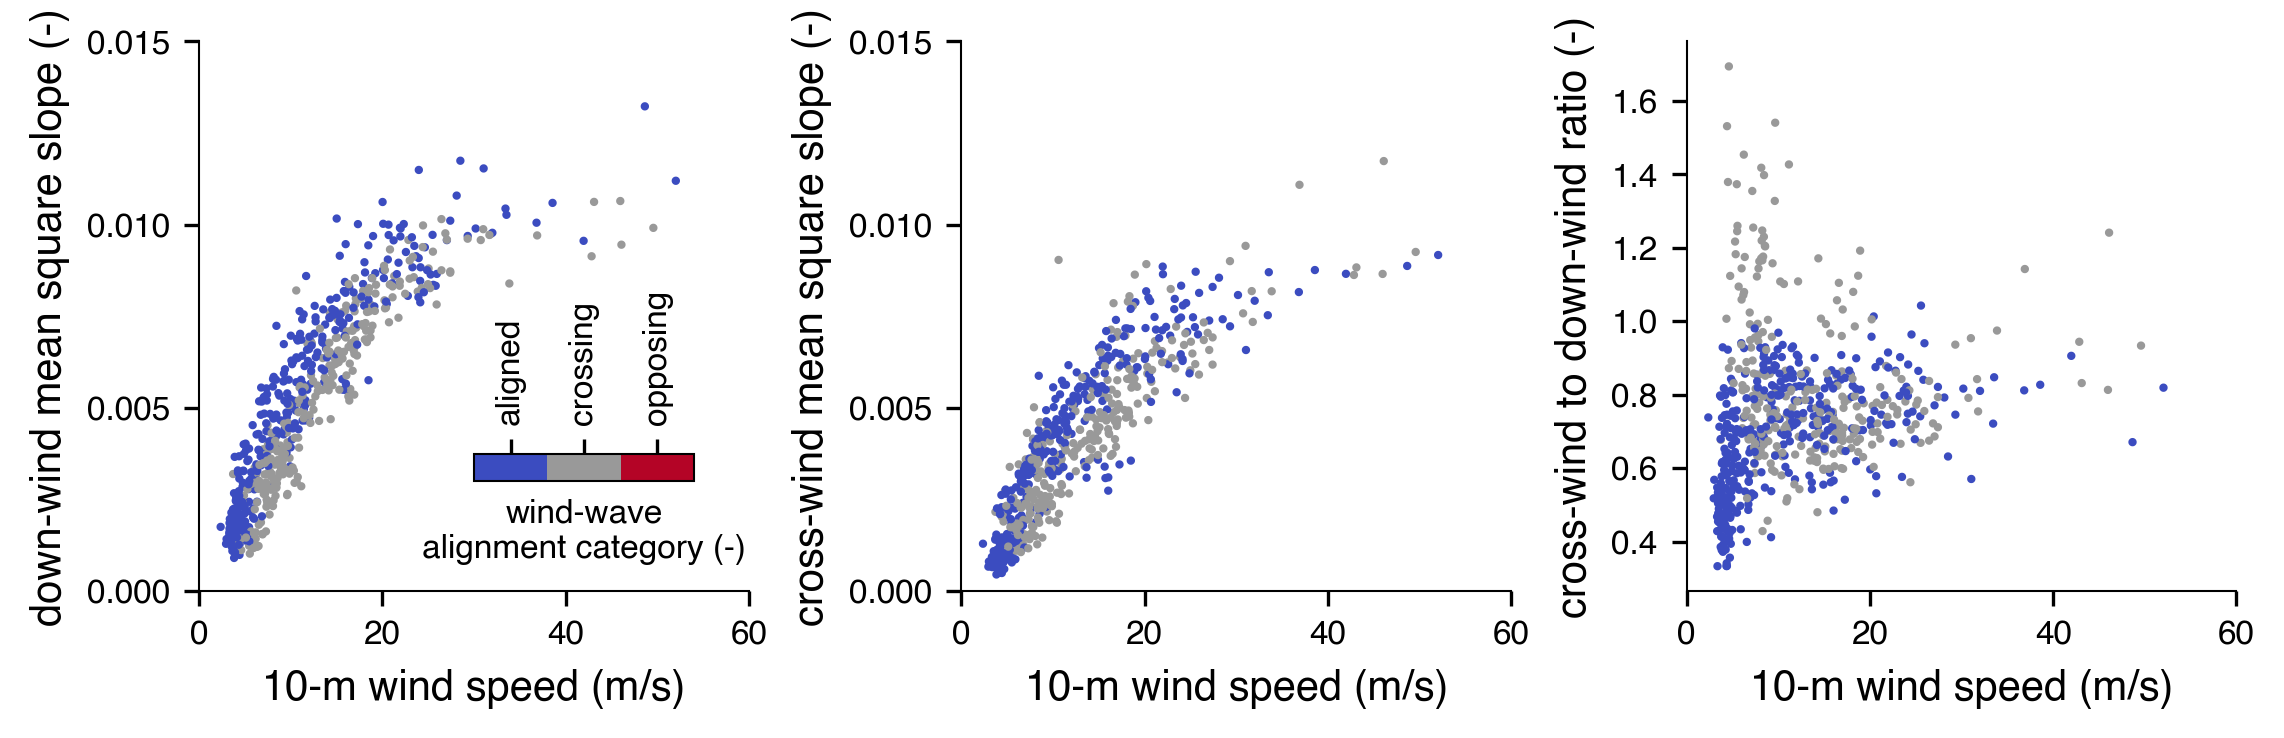

In [45]:
def plot_mean_wind_wave_alignment_cat_mss_components(
    ax_down,
    ax_cross,
    ax_ratio,
    **kwargs,
):
    color_column_name = 'mean_wind_wave_alignment_int'
    cmap = plotting.wind_wave_alignment_cat_plot_kwargs['cmap']
    norm = plotting.wind_wave_alignment_cat_plot_kwargs['norm']

    # mss data
    drifter_mss_down_sc = plot_drifter_mss_down_wind(
        ax_down,
        color_column_name=color_column_name,
        cmap=cmap,
        norm=norm,
        **kwargs,
    )
    drifter_mss_cross_sc = plot_drifter_mss_cross_wind(
        ax_cross,
        color_column_name=color_column_name,
        cmap=cmap,
        norm=norm,
        **kwargs,
    )
    drifter_mss_ratio_sc = plot_drifter_mss_ratio(
        ax_ratio,
        color_column_name=color_column_name,
        cmap=cmap,
        norm=norm,
        **kwargs,
    )

    # colorbar
    cbar, cax = plotting.create_inset_colorbar(
        drifter_mss_down_sc[0],
        ax_down,
        bounds=[0.5, 0.2, 0.4, 0.05],
        orientation='horizontal'
    )
    cax.xaxis.set_ticks_position('top')
    cax.xaxis.set_label_position('bottom')
    cbar.set_label('wind-wave\nalignment category (-)', fontsize=plotting.small_font_size)
    cax.tick_params(axis='x', labelrotation=90)
    cbar_ticks = list(plotting.alignment_cat_map_inv.keys())
    cbar.set_ticks(cbar_ticks, labels=[plotting.alignment_cat_map_inv[tick] for tick in cbar_ticks])

    plotting.set_square_aspect(ax_down)
    plotting.set_square_aspect(ax_cross)
    plotting.set_square_aspect(ax_ratio)
    plotting.remove_top_and_right_spines(ax_down)
    plotting.remove_top_and_right_spines(ax_cross)
    plotting.remove_top_and_right_spines(ax_ratio)

    return drifter_mss_down_sc, drifter_mss_cross_sc, drifter_mss_ratio_sc, cbar


fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5), sharex=True, sharey=False, constrained_layout=True)
plot_mean_wind_wave_alignment_cat_mss_components(
    ax_down=axes[0],
    ax_cross=axes[1],
    ax_ratio=axes[2],
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    s=1,
)
axes[0].xaxis.set_tick_params(labelbottom=True)

Down-wind slopes are consistently higher in aligned wind and wave conditions across all wind speeds.
Cross-wind slopes are elevated in aligned wind and waves until 30 m/s, beyond which cross-wind slopes in the aligned condition cease to increase.
In contrast to the components, the ratio of cross-wind to down-wind mss, a measure of slope directionality, does not show substantial variation over most wind speeds.
The exceptions are at low wind speeds, where the ratio is sensitive, and at high wind speeds, where there are few data points.

## References

Banner, M. L., Gemmrich, J. R., & Farmer, D. M. (2002). Multiscale Measurements of Ocean Wave Breaking Probability. Journal of Physical Oceanography, 32(12), 3364–3375. https://doi.org/10.1175/1520-0485(2002)032<3364:MMOOWB>2.0.CO;2

Chen, S., Qiao, F., Zhang, J. A., Xue, Y., Ma, H., & Chen, S. (2022). Observed Drag Coefficient Asymmetry in a Tropical Cyclone. Journal of Geophysical Research: Oceans, 127(9), e2021JC018360. https://doi.org/10.1029/2021JC018360

Chen, X., Ginis, I., & Hara, T. (2020). Impact of Shoaling Ocean Surface Waves on Wind Stress and Drag Coefficient in Coastal Waters: 2. Tropical Cyclones. Journal of Geophysical Research: Oceans, 125(7). https://doi.org/10.1029/2020JC016223

Davis, J. R., Thomson, J., Houghton, I. A., Doyle, J. D., Komaromi, W. A., Fairall, C. W., Thompson, E. J., & Moskaitis, J. R. (2023). Saturation of Ocean Surface Wave Slopes Observed During Hurricanes. Geophysical Research Letters, 50(16), e2023GL104139. https://doi.org/10.1029/2023GL104139

Edson, J. B., Jampana, V., Weller, R. A., Bigorre, S. P., Plueddemann, A. J., Fairall, C. W., Miller, S. D., Mahrt, L., Vickers, D., & Hersbach, H. (2013). On the Exchange of Momentum over the Open Ocean. Journal of Physical Oceanography, 43(8), 1589–1610. https://doi.org/10.1175/JPO-D-12-0173.1

Iyer, S., Thomson, J., Thompson, E., & Drushka, K. (2022). Variations in Wave Slope and Momentum Flux From Wave‐Current Interactions in the Tropical Trade Winds. Journal of Geophysical Research: Oceans, 127(3). https://doi.org/10.1029/2021JC018003

Hsu, J.-Y., Lien, R.-C., D’Asaro, E. A., & Sanford, T. B. (2019). Scaling of Drag Coefficients Under Five Tropical Cyclones. Geophysical Research Letters, 46(6), 3349–3358. https://doi.org/10.1029/2018GL081574

Husain, N. T., Hara, T., & Sullivan, P. P. (2022). Wind Turbulence over Misaligned Surface Waves and Air–Sea Momentum Flux. Part II: Waves in Oblique Wind. Journal of Physical Oceanography, 52(1), 141–159. https://doi.org/10.1175/JPO-D-21-0044.1

Manzella, E., Hara, T., & Sullivan, P. P. (2024). Reduction of Drag Coefficient Due To Misaligned Wind‐Waves. Journal of Geophysical Research: Oceans, 129(5), e2023JC020593. https://doi.org/10.1029/2023JC020593

Reichl, B. G., Hara, T., & Ginis, I. (2014). Sea state dependence of the wind stress over the ocean under hurricane winds. Journal of Geophysical Research: Oceans, 119(1), 30–51. https://doi.org/10.1002/2013JC009289

Schwendeman, M., Thomson, J., & Gemmrich, J. R. (2014). Wave Breaking Dissipation in a Young Wind Sea. Journal of Physical Oceanography, 44(1), 104–127. https://doi.org/10.1175/JPO-D-12-0237.1

Zhou, X., Hara, T., Ginis, I., D’Asaro, E., Hsu, J.-Y., & Reichl, B. G. (2022). Drag Coefficient and Its Sea State Dependence under Tropical Cyclones. Journal of Physical Oceanography, 52(7), 1447–1470. https://doi.org/10.1175/JPO-D-21-0246.1
